In [2]:
# `setup.jl` will load core packages including the ED package
include("./src/setup.jl")

In [5]:
# Load data
Ainfs_data = load( "data/Ainfs_dict_low_gamma_g.jld"  )
# Split data into important variables
Ainfs_dict = Ainfs_data["Ainfs_dict"]
t_list = Ainfs_data["t_list"]
L_list = Ainfs_data["L_list"]
jz_list = Ainfs_data["jz_list"]
gamma_list = Ainfs_data["gamma_list"]
g_list = Ainfs_data["g_list"]
jx_list = Ainfs_data["jx_list"]
jx = jx_list[1]

1.0

In [6]:
function get_gamma_ed_from_ainf( ainf::Array{Float64}, t_list::Array{Float64}, v::Int64 )
    #=
    Calculates a first order approximation for \Gamma^{ED} for a given (L, gamma, jz, jx, g)
    L aught to be 12 or higher or else the \Gamma^{ED} value becomes dependant on L.
    =#
    
    # 0 is the dummy value for gamma_ed, filled in using the loop
    gamma_ed = 0.0
    
    # v1 normalization factor
    A = 1
    # v2 normalization factor
    A2 = ainf[10]
    # v3 normalization factor
    A3 = ainf[20]
    
    if v==2
        A = A2
    elseif v==3
        A = A3
    end
    
    # determining gamma from ed ainf
    for dati in 1:length(ainf)#:-1:1
        ##########
        # NOTE ### The following `if` statement is slightly off from the original code! 
        ########## Values may be off by up to 50%, so everything is currently an approximation...
        # if ainf[dati] > phi_o[1]^2*exp(-1) # <- Daniel's code
        #if ainf[dati] > (A^2) * exp(-1) # <- adapted code, without phi_o
        if ainf[dati] < (A^2) * exp(-1)
            gamma_ed = 1/t_list[dati]
            break
        end
    end
    
    return gamma_ed
    
end

get_gamma_ed_from_ainf (generic function with 1 method)

In [98]:
get_gamma_ed_from_ainf( Ainfs_dict[(L_list[6], jz_list[2], gamma_list[2])], t_list, 2 )

0.0001

# Plot $\Gamma^{ED}$ vs system size L to ensure convergence

In [8]:
length(gamma_list)*length(g_list)*length(jz_list)

504

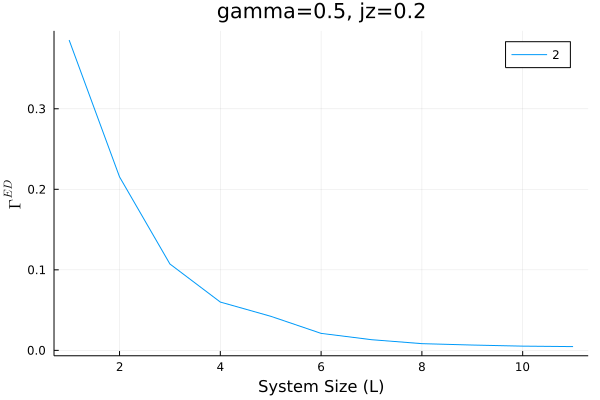

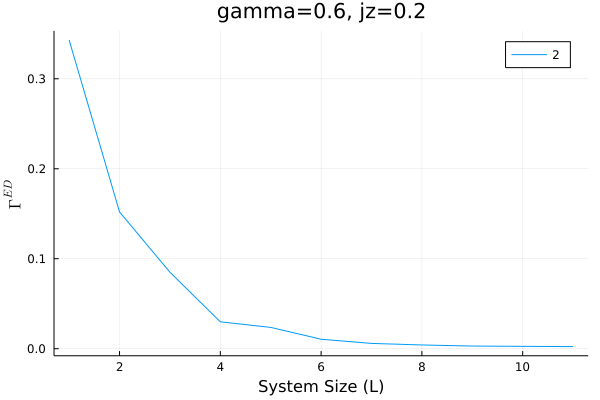

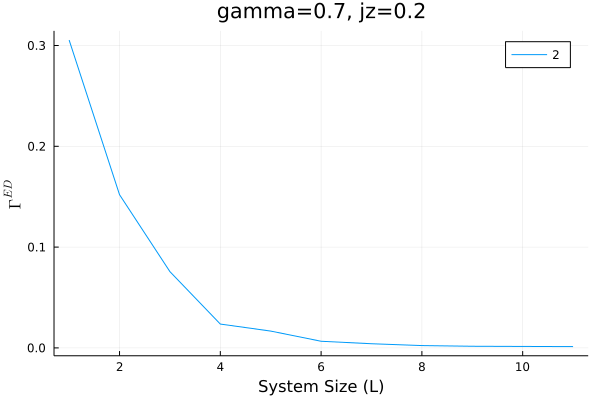

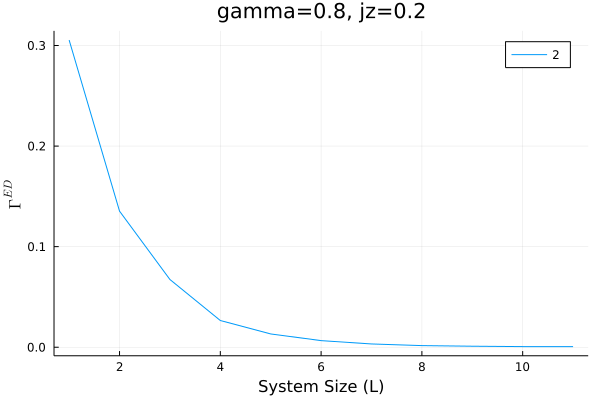

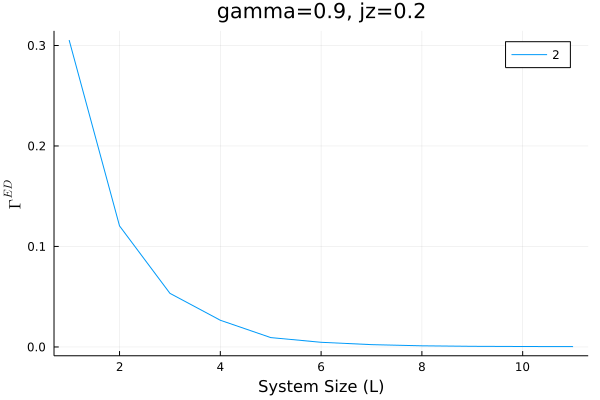

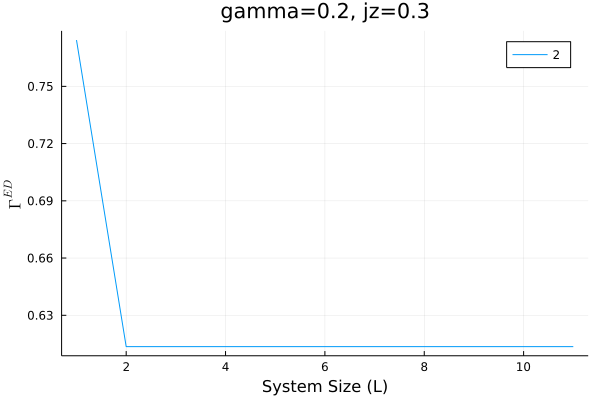

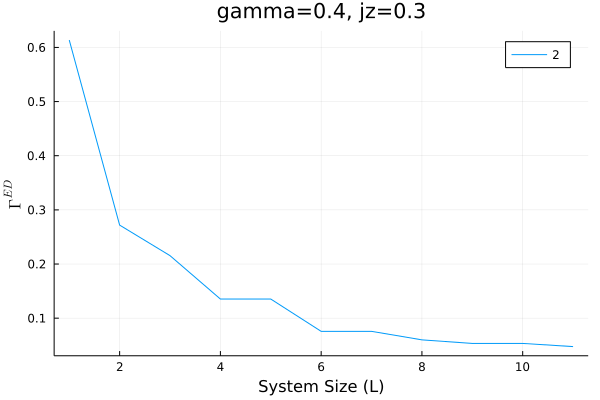

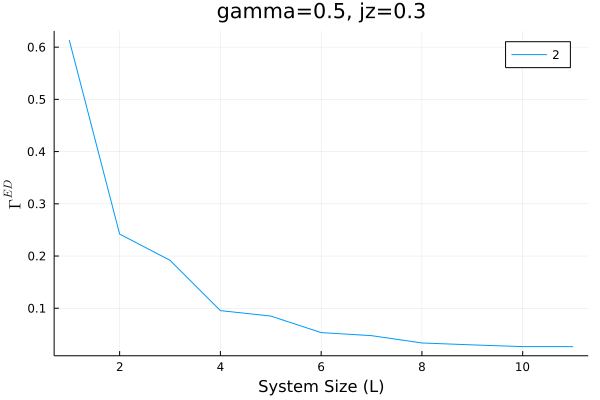

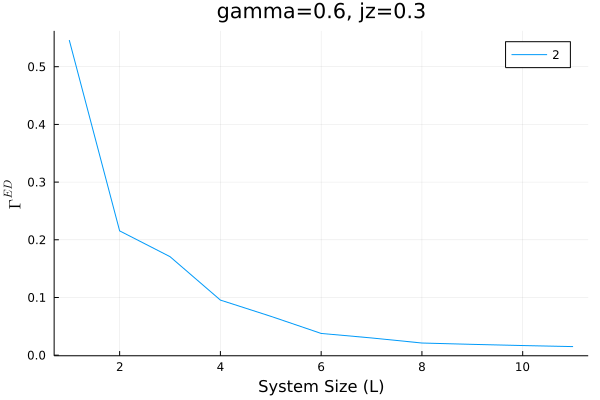

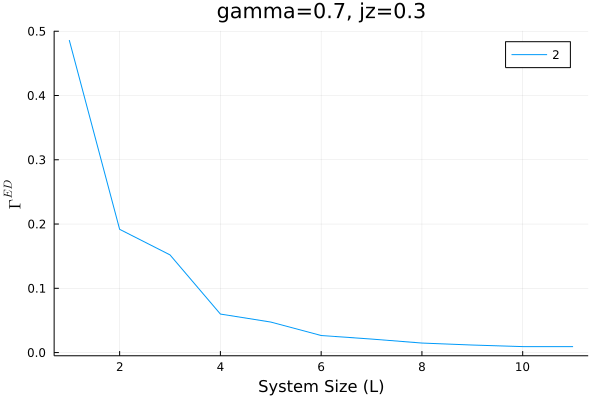

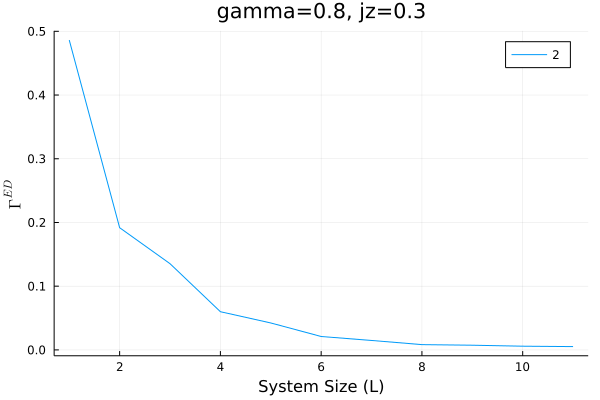

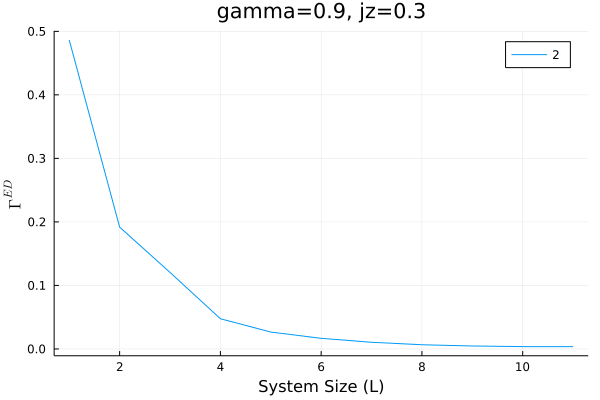

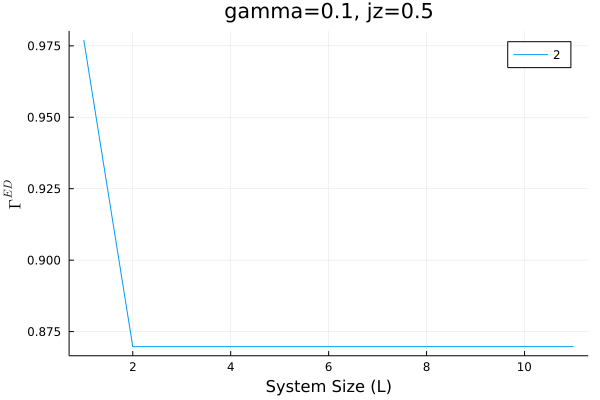

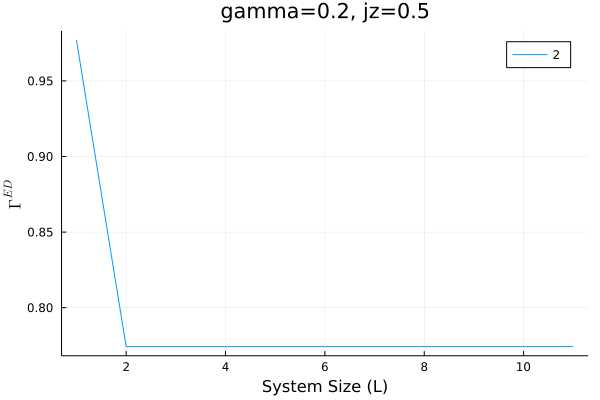

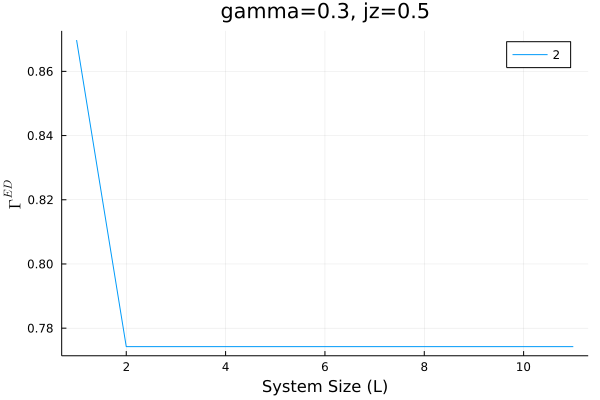

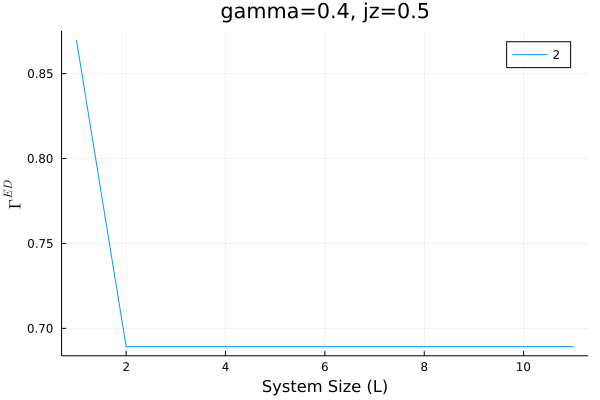

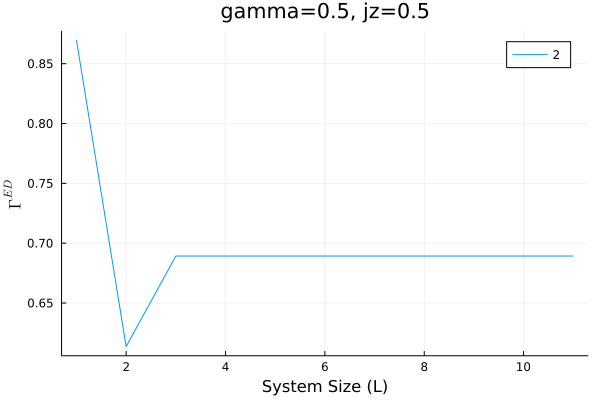

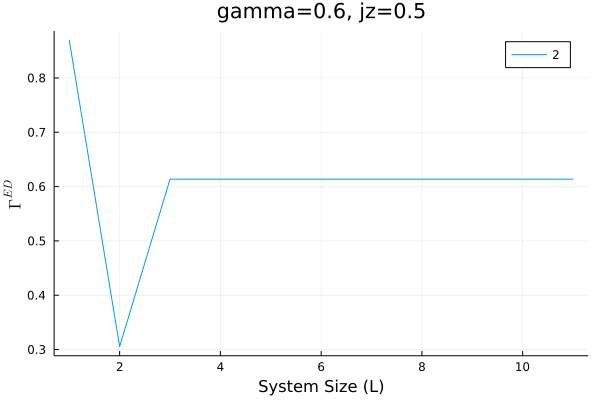

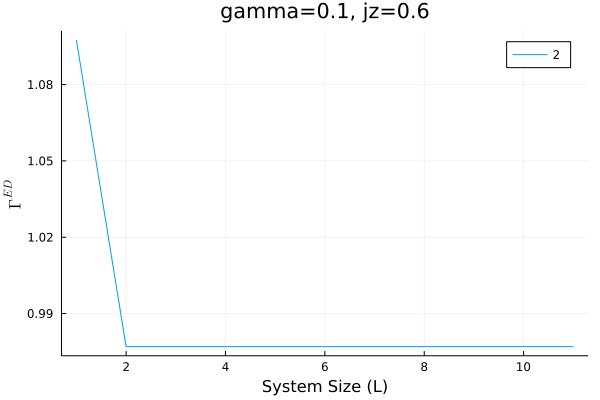

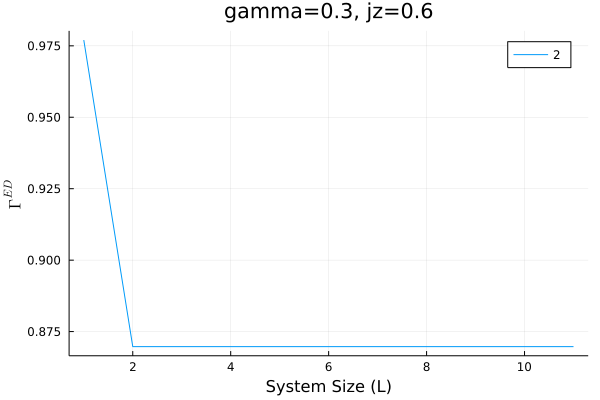

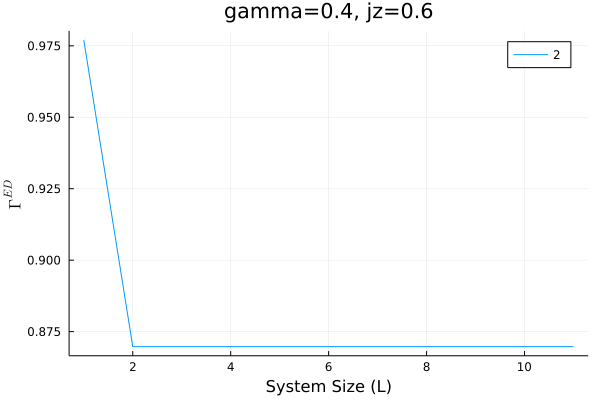

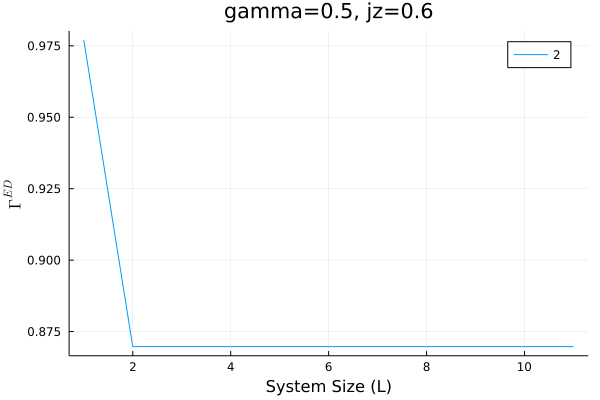

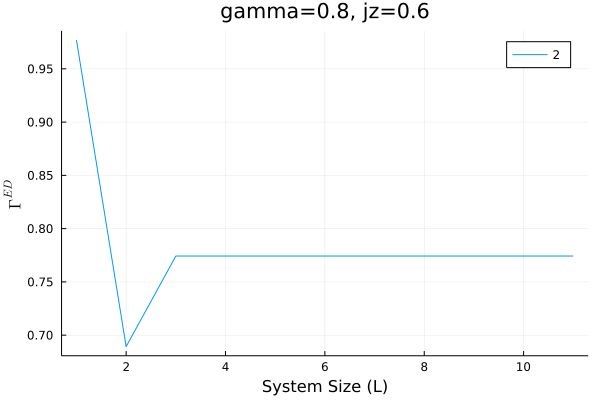

In [146]:
jz = 0.6
gamma = 0.1

L_interested = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_interested = L_list
jz_interested = jz_list
gamma_interested = gamma_list
# gamma_interested = [0.1]

gamma_eds2 = zeros( length(L_interested) )

for (jz_i, jz) in enumerate(jz_interested)
    for (gamma_i, gamma) in enumerate(gamma_interested)
        gamma_eds = zeros( length(L_interested) )
        for (L_i, L) in enumerate(L_interested)
            gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma)], t_list, 2 ) 
            gamma_eds[L_i] = gamma_ed
        end
        display( Plots.plot( gamma_eds ,
                xlabel="System Size (L)", ylabel=L"\Gamma^{ED}",
                title="gamma="*string(gamma)*", jz="*string(jz), 
                label = string.(L_interested'))
            )
    end
end

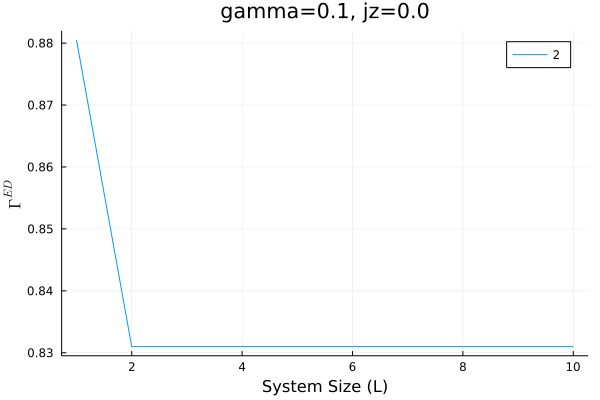

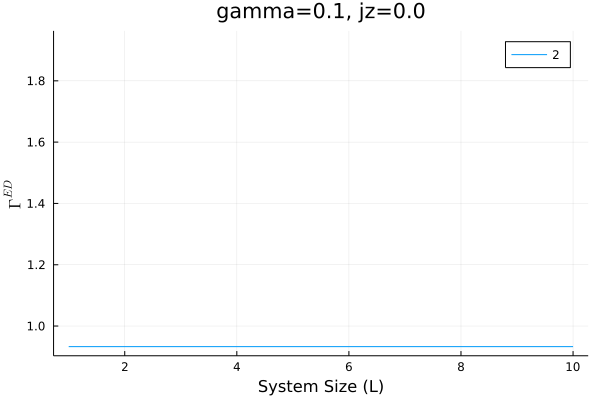

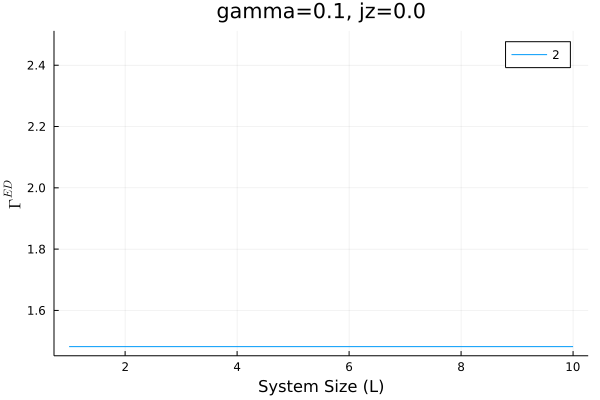

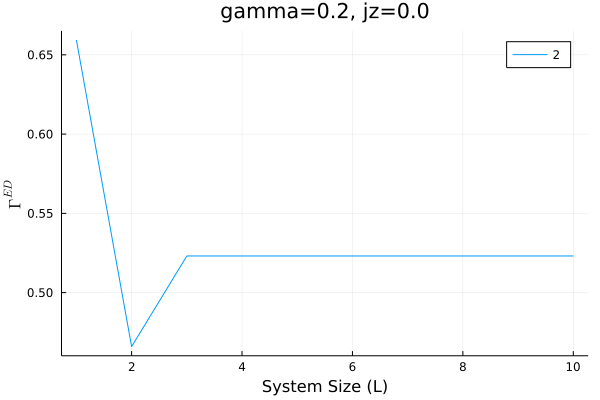

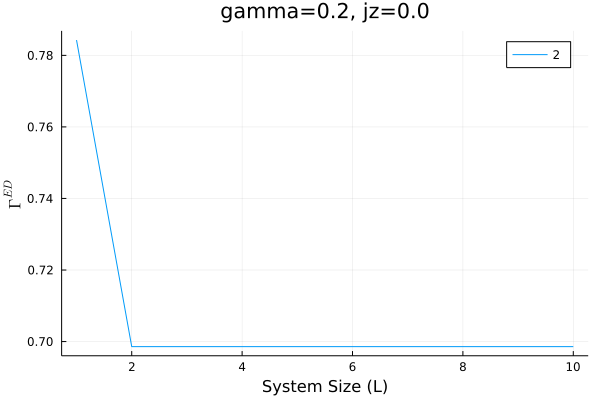

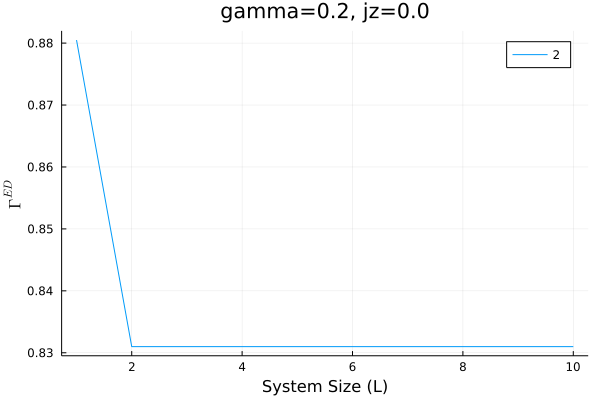

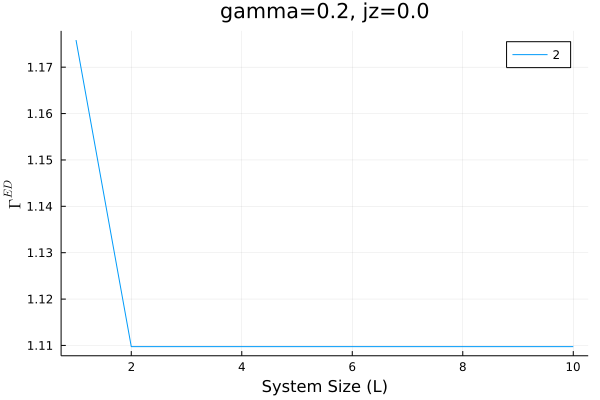

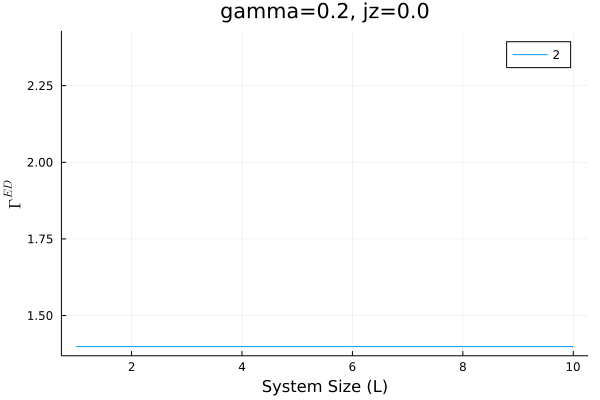

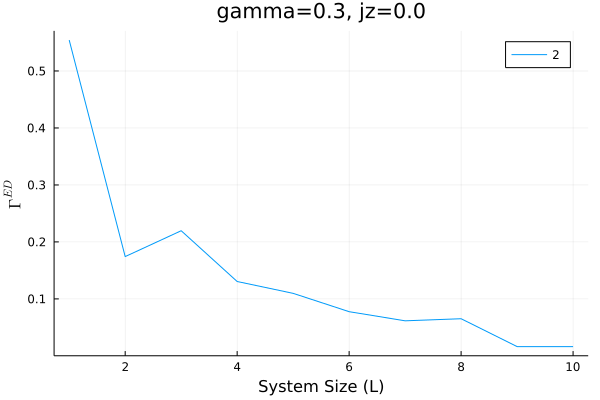

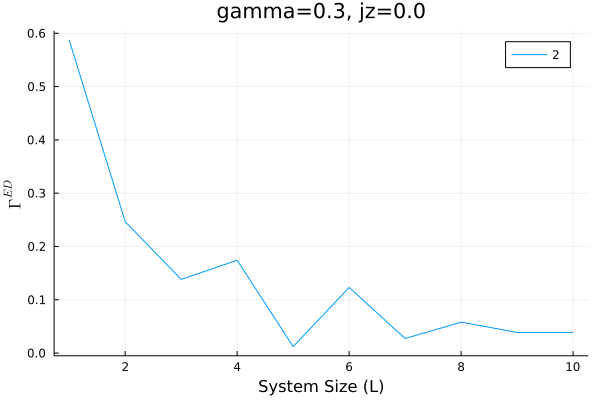

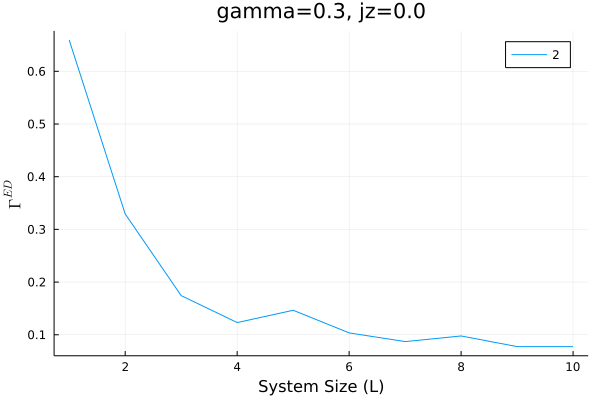

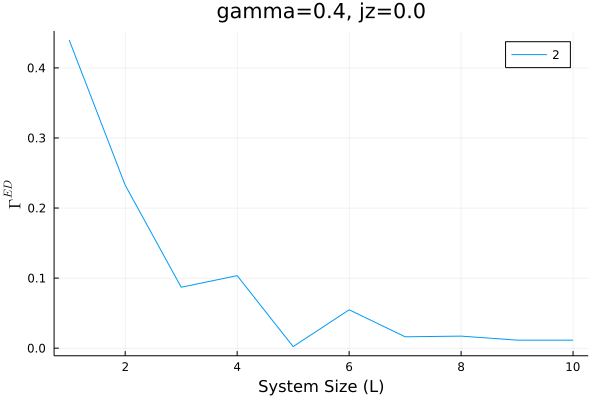

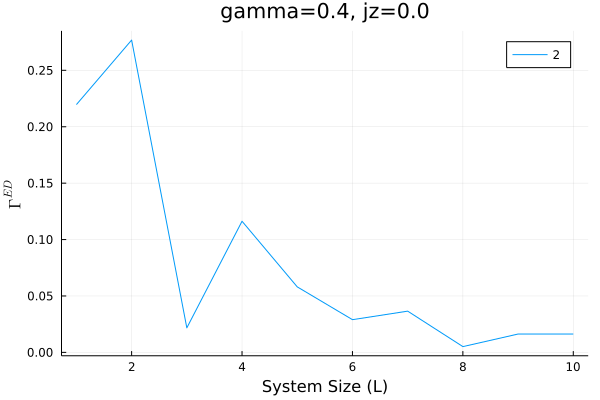

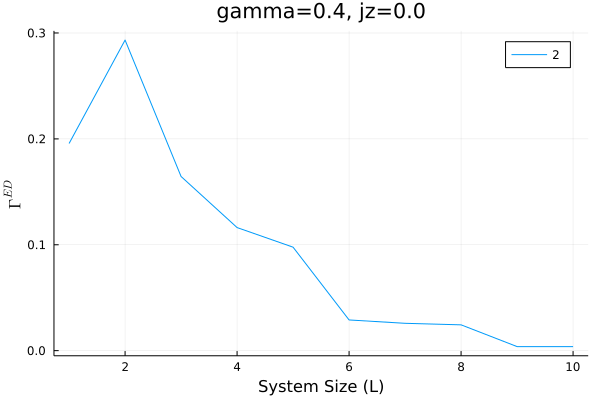

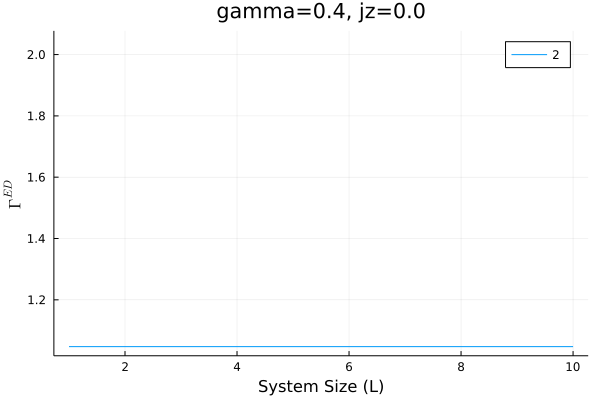

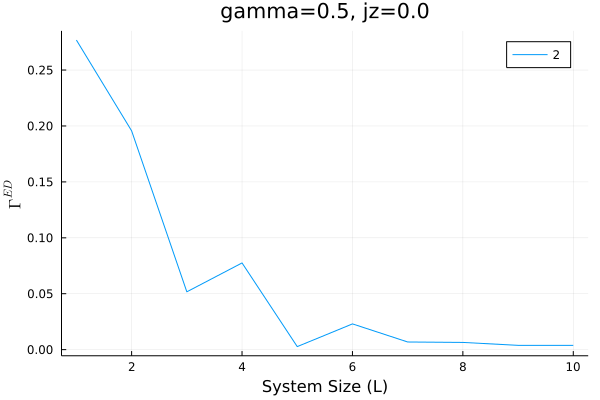

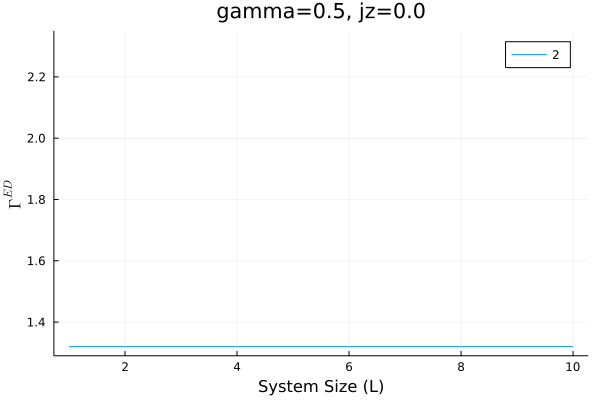

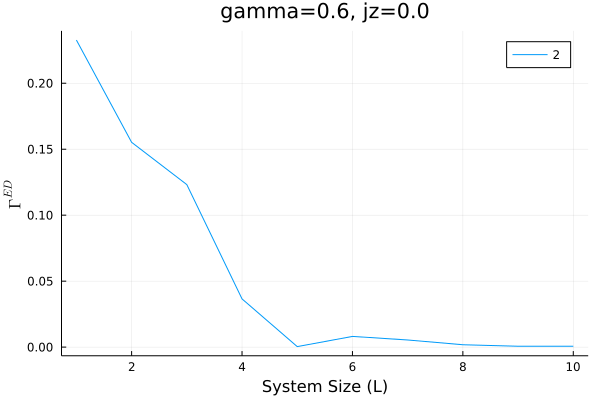

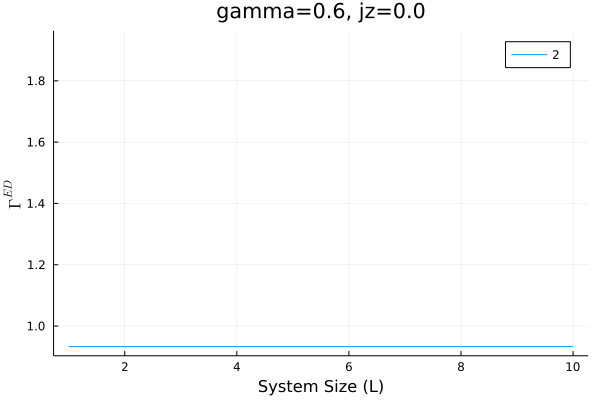

In [14]:
jz = 0.6
gamma = 0.1

L_interested = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_interested = L_list
jz_interested = jz_list[1]
gamma_interested = gamma_list[1:6]
g_interested = g_list
# gamma_interested = [0.1]

gamma_eds2 = zeros( length(L_interested) )

for (jz_i, jz) in enumerate(jz_interested)
    for (gamma_i, gamma) in enumerate(gamma_interested)
        for (g_i, g) in enumerate(g_interested)
            gamma_eds = zeros( length(L_interested) )
            for (L_i, L) in enumerate(L_interested)
                gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma, g)], t_list, 2 ) 
                gamma_eds[L_i] = gamma_ed
            end
            display( Plots.plot( gamma_eds ,
                    xlabel="System Size (L)", ylabel=L"\Gamma^{ED}",
                    title="gamma="*string(gamma)*", jz="*string(jz), 
                    label = string.(L_interested'))
                )
        end
    end
end

# Plot various $A_{inf}$ at different L

In [11]:
keys(Ainfs_dict)

KeySet for a Dict{Any, Any} with 4536 entries. Keys:
  (4, 0.1, 0.3, 0.7)
  (10, 0.2, 0.4, 0.1)
  (7, 0.1, 0.6, 0.9)
  (4, 0.3, 0.9, 0.2)
  (9, 0.5, 0.7, 0.3)
  (2, 0.9, 0.6, 0.9)
  (4, 0.0, 0.5, 0.4)
  (3, 0.7, 0.6, 0.5)
  (7, 0.2, 0.2, 0.5)
  (6, 0.1, 0.3, 0.9)
  (6, 0.1, 0.8, 0.7)
  (4, 0.4, 0.3, 0.1)
  (4, 0.3, 0.8, 0.5)
  (3, 0.4, 0.3, 0.7)
  (3, 0.3, 0.2, 0.2)
  (10, 0.1, 0.1, 0.5)
  (6, 0.9, 0.1, 0.3)
  (8, 0.0, 0.7, 0.2)
  (7, 0.9, 0.4, 0.3)
  (7, 0.3, 0.2, 0.4)
  (4, 0.9, 0.8, 0.2)
  (6, 0.4, 0.8, 0.1)
  (2, 0.3, 0.3, 0.5)
  (5, 0.5, 0.8, 0.3)
  (9, 0.9, 0.6, 0.9)
  ⋮

In [9]:
L_list_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_list_test = [ 2, 4, 6, 8]


Ls_plot = zeros( (length(L_list_test), length(Ainfs_dict[( 2, 0.6, 0.1)])) )

for (L_i, L) in enumerate(L_list_test)
    Ls_plot[L_i, :] = Ainfs_dict[( L, 0.6, 0.1, )]
end

Plots.plot( t_list, Ls_plot', xaxis=:log, 
            xlabel="time (s)", ylabel="A_inf",
            title="A_inf Plot", label = string.(L_list_test'))
hline!([exp(-1)], linestyle=:dash, color=:black)

LoadError: KeyError: key (2, 0.6, 0.1) not found

# Plot various $\Gamma^{ED}$ vs $\frac{1}{jz}$

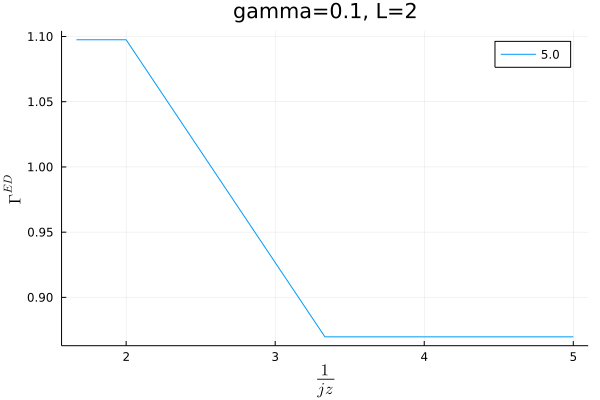

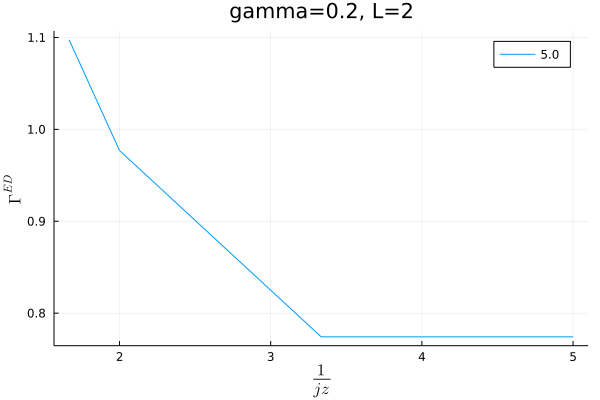

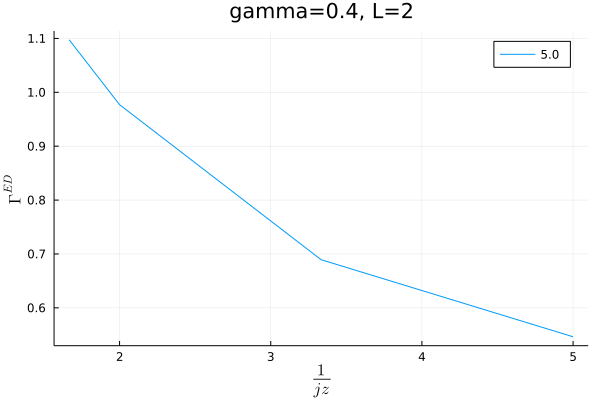

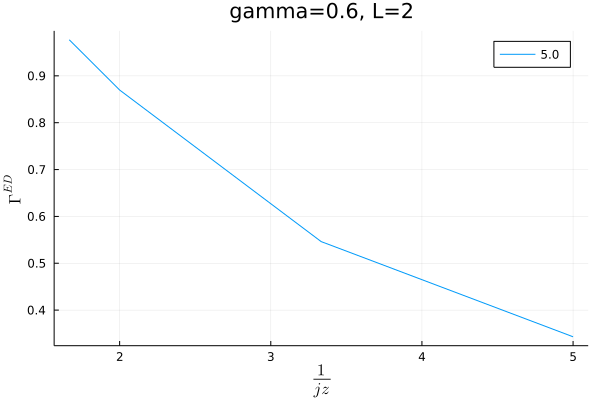

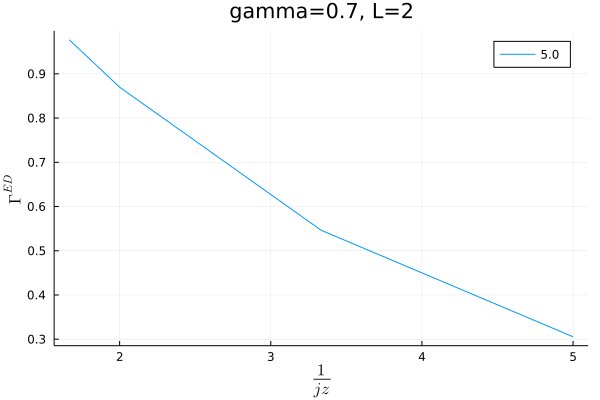

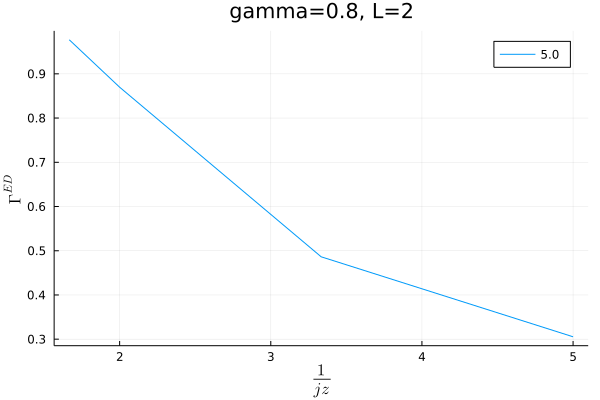

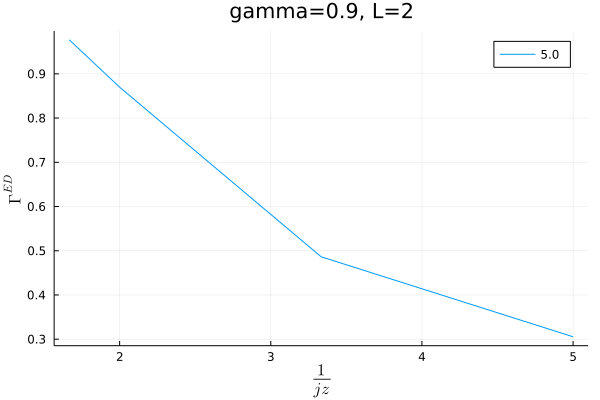

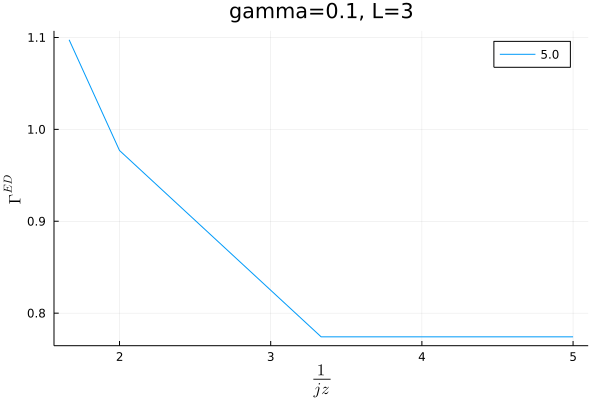

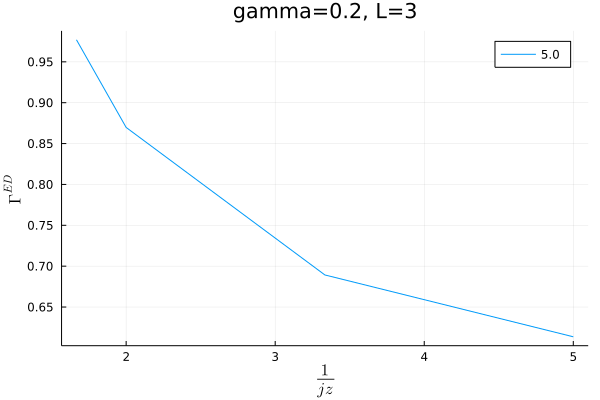

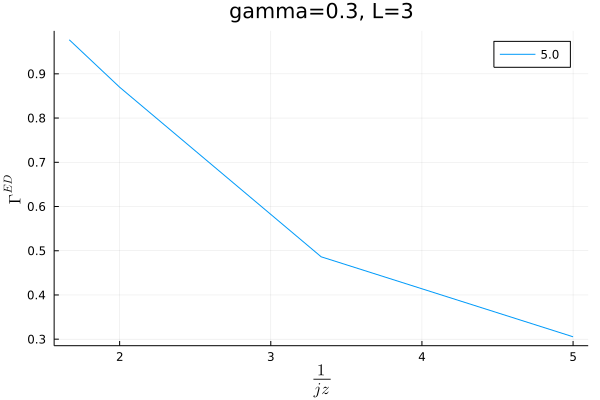

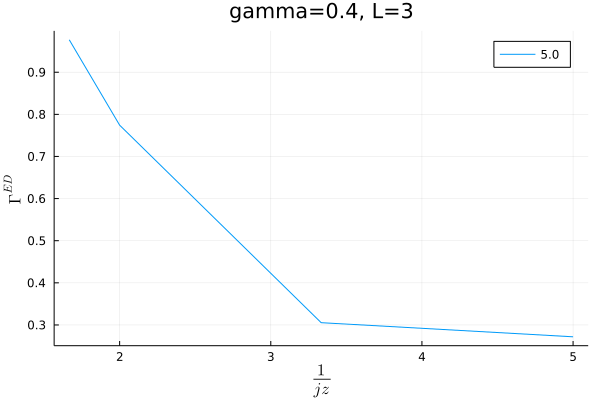

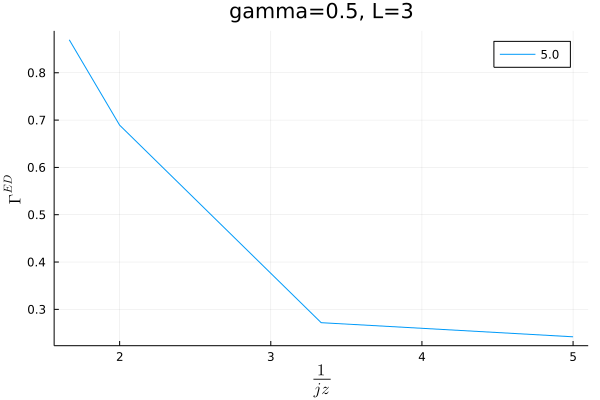

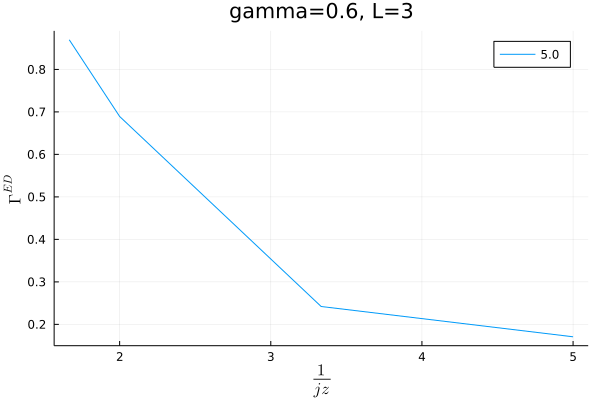

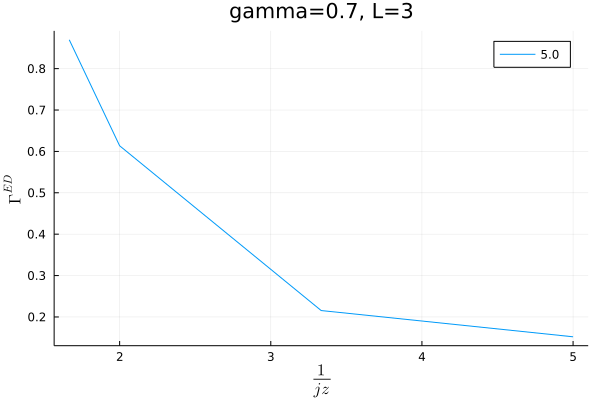

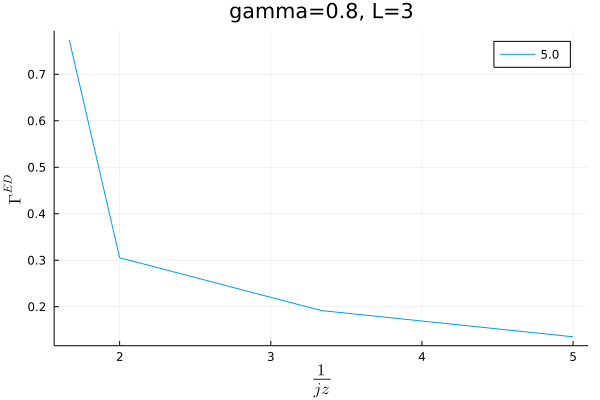

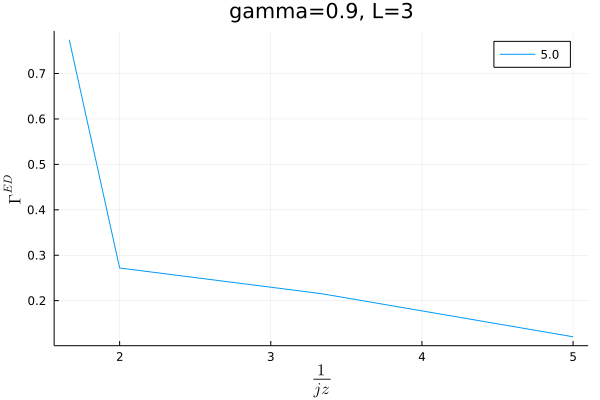

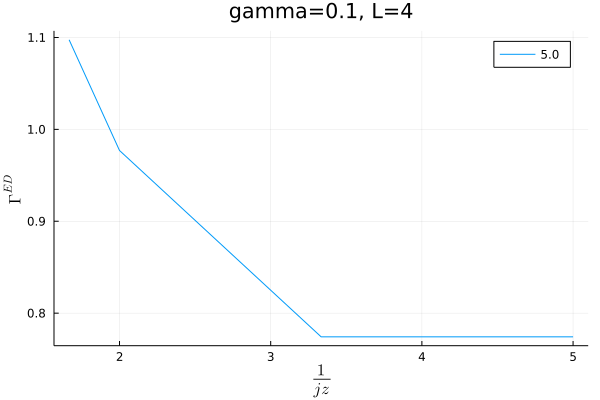

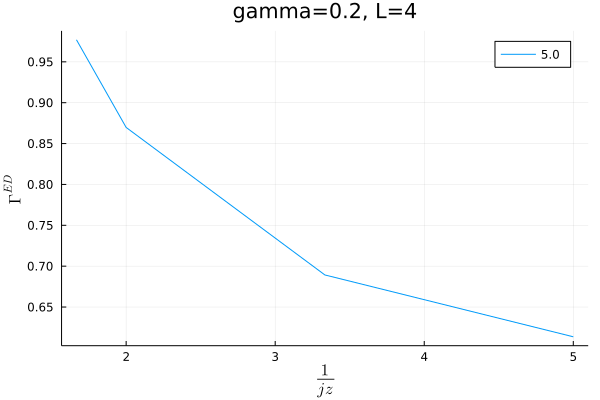

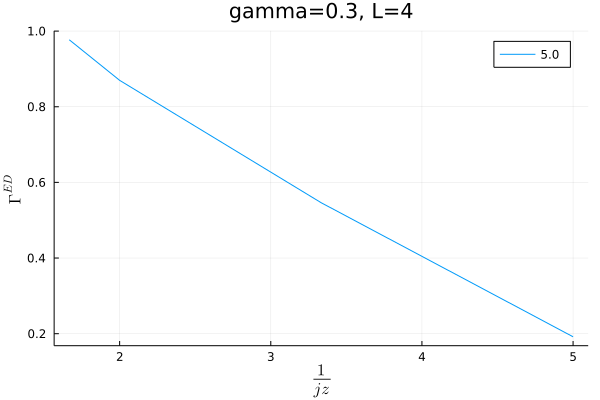

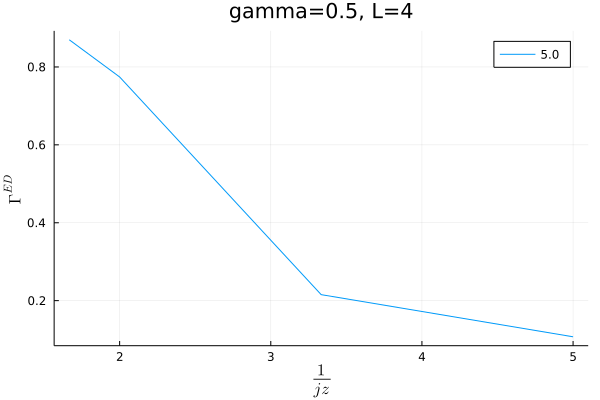

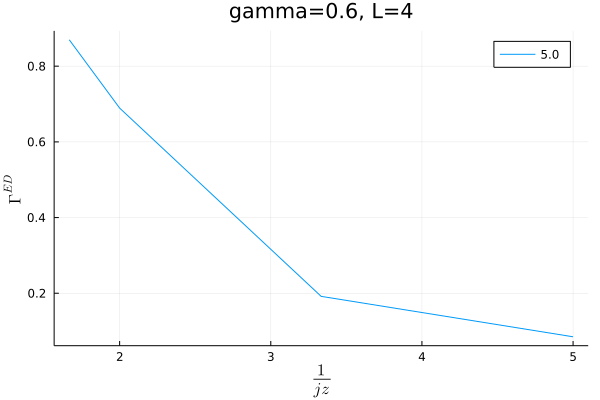

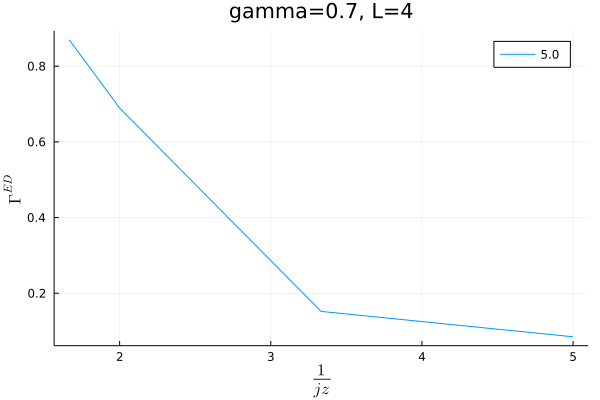

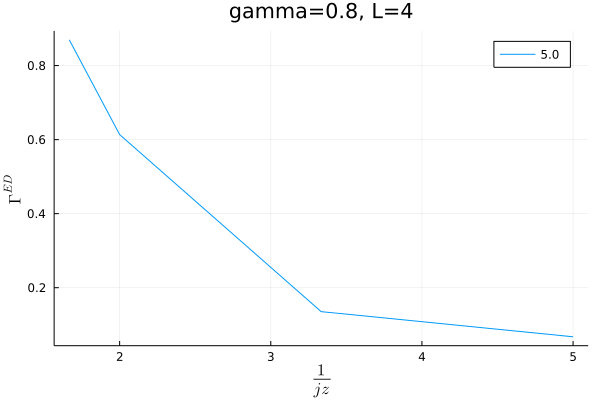

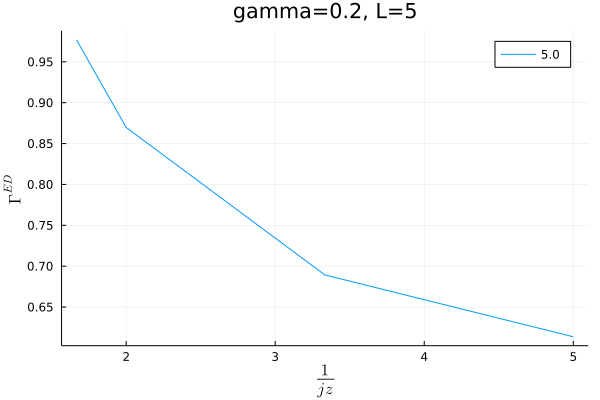

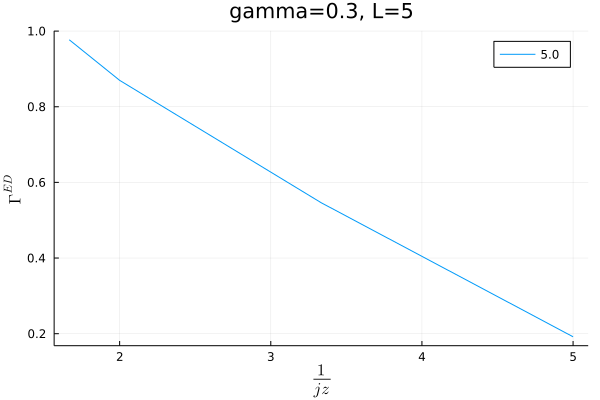

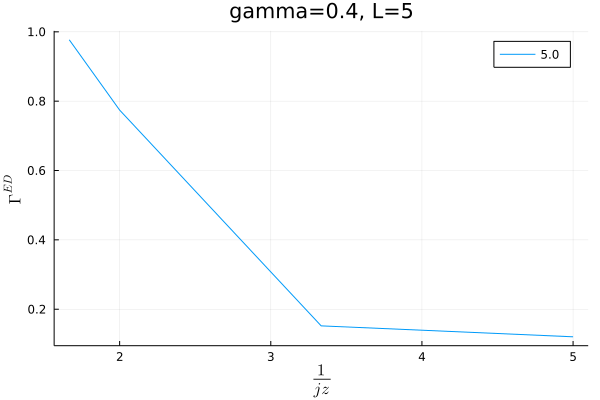

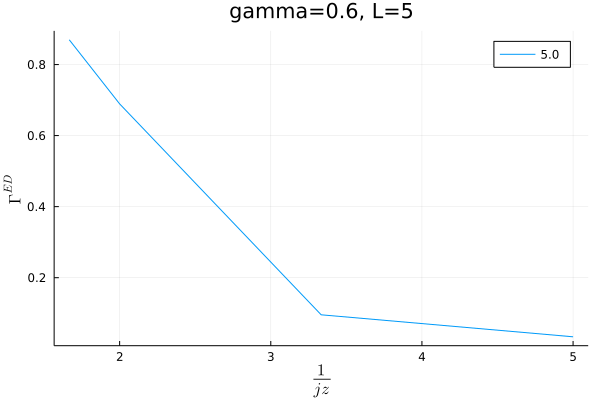

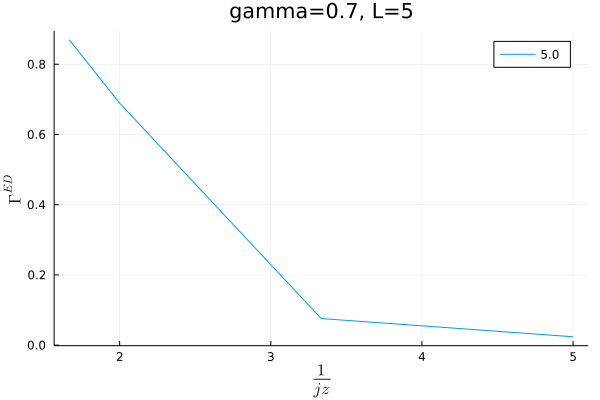

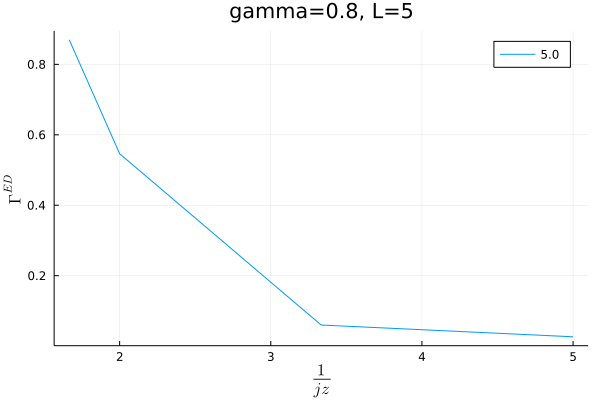

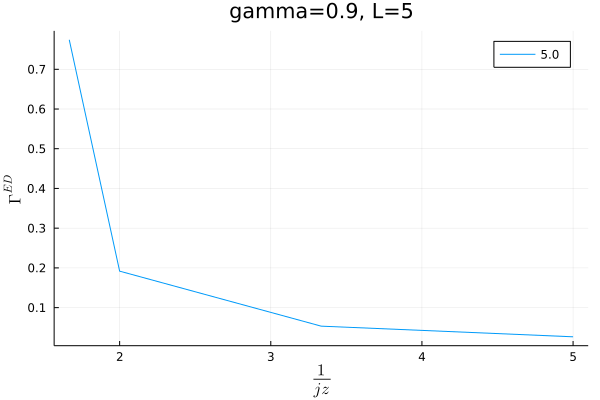

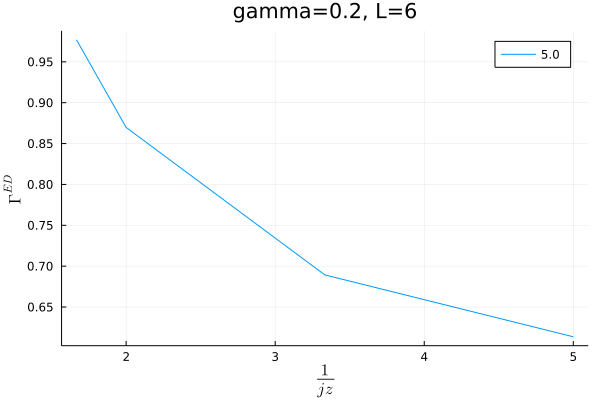

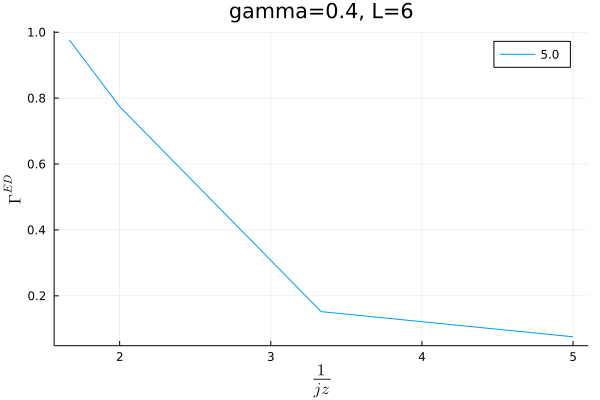

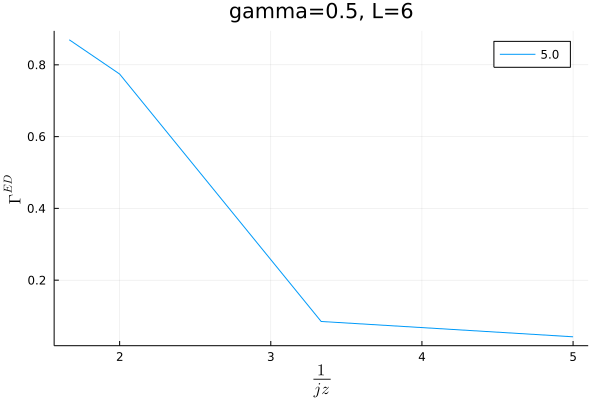

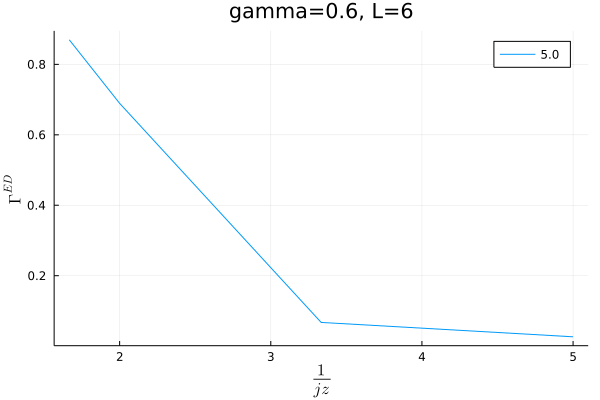

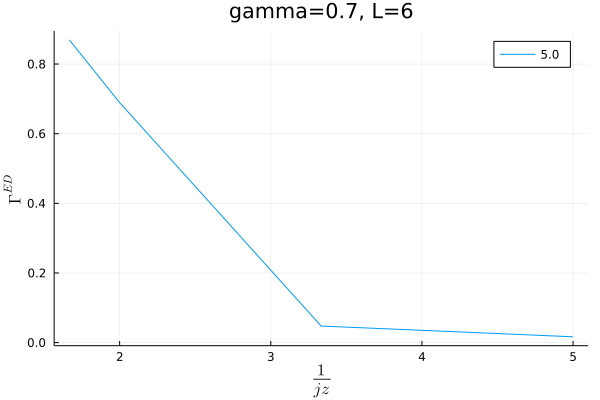

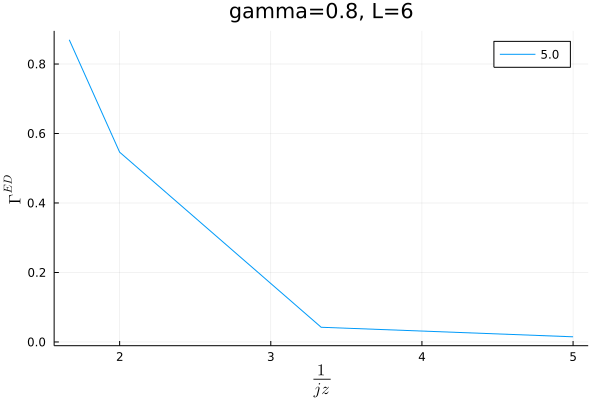

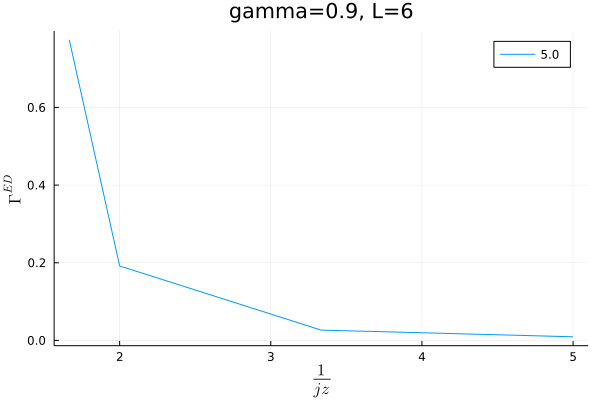

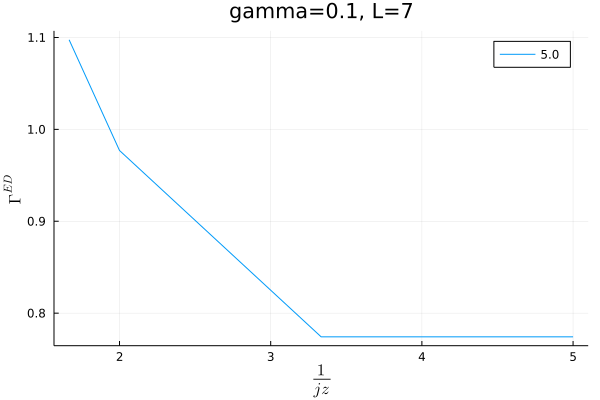

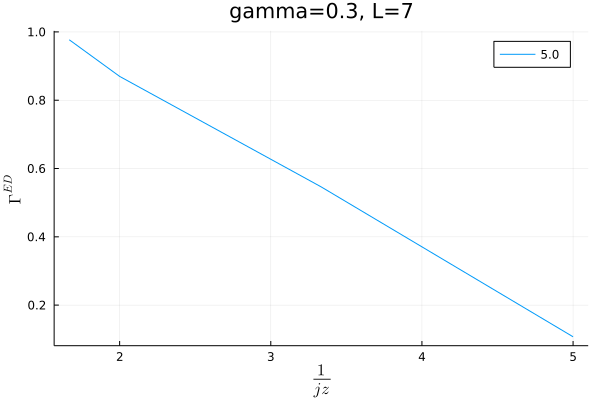

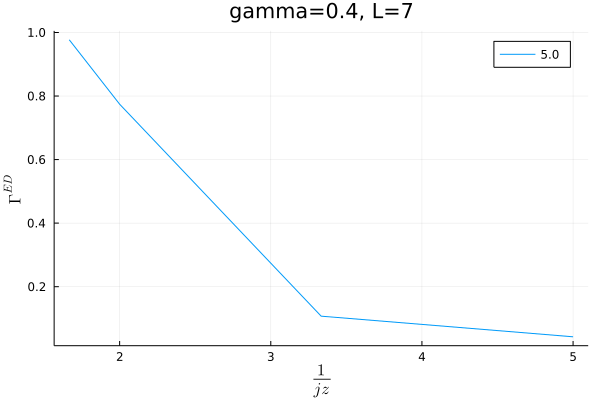

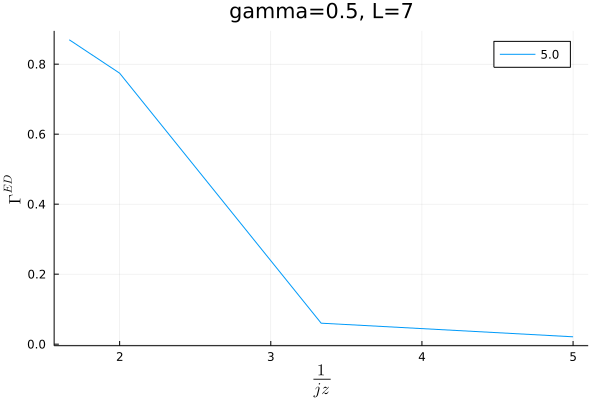

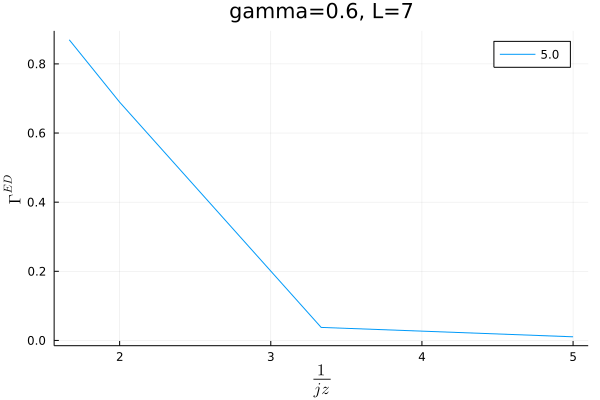

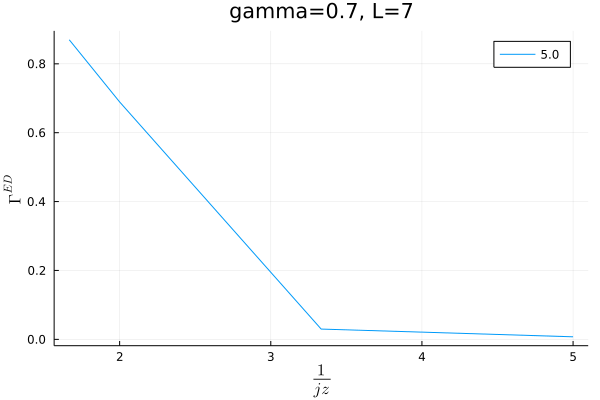

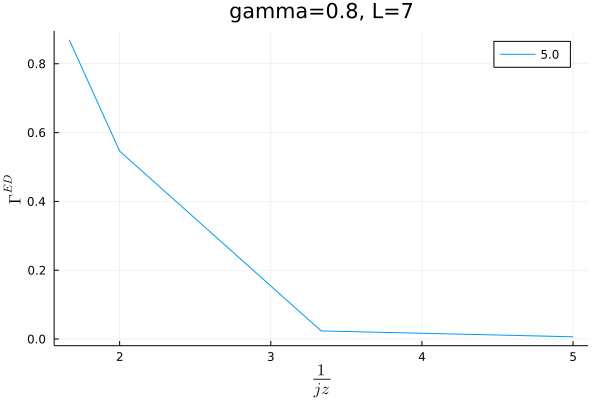

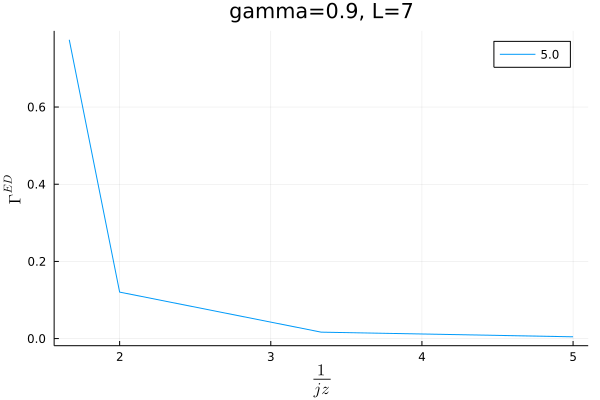

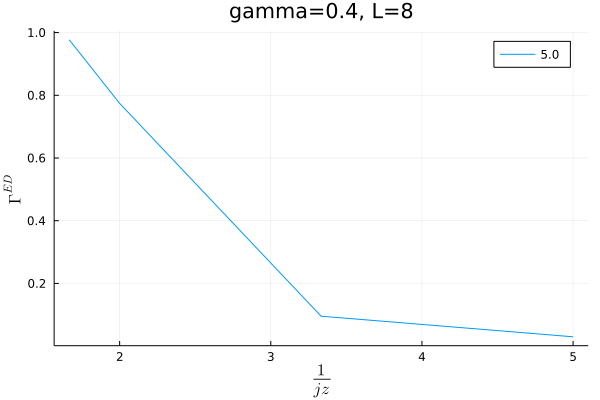

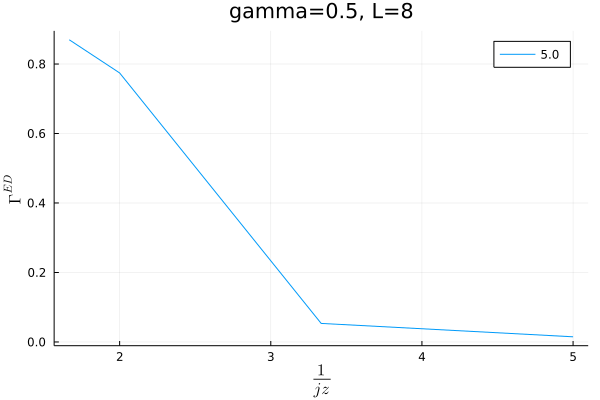

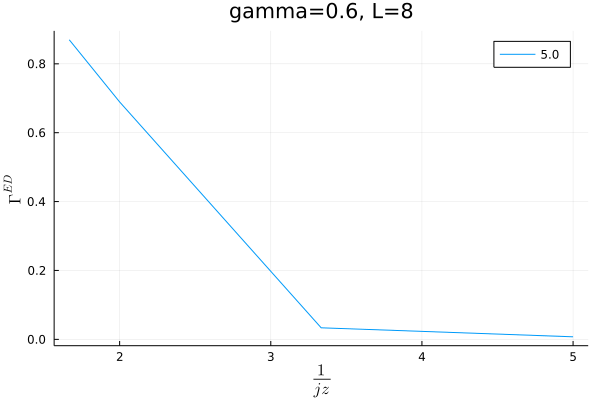

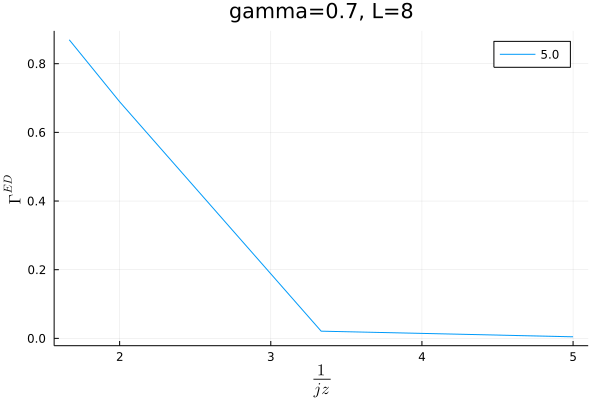

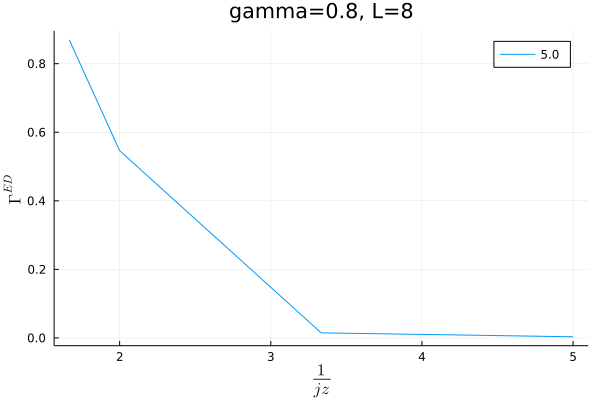

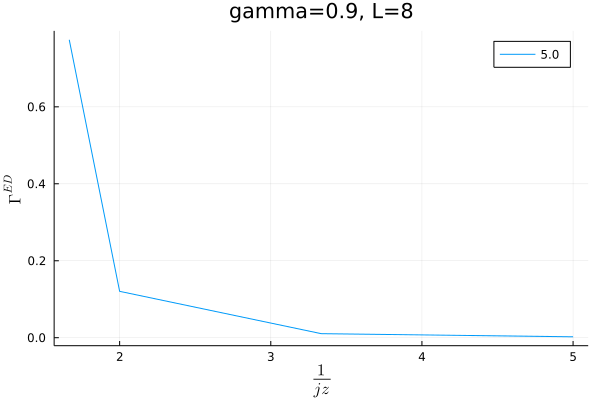

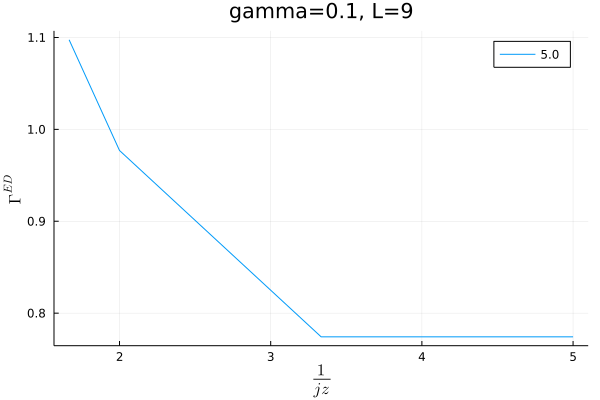

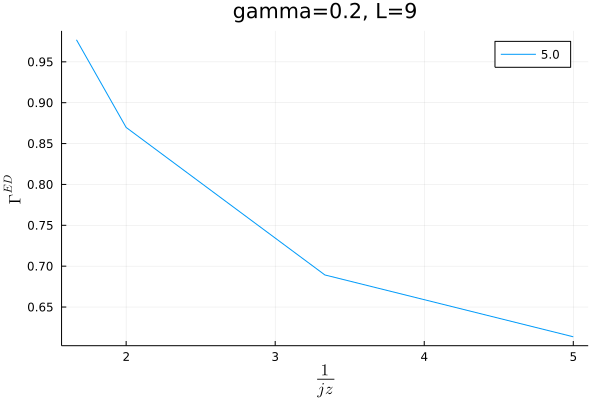

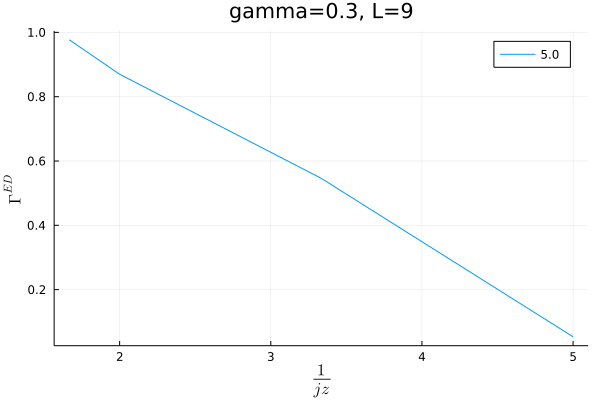

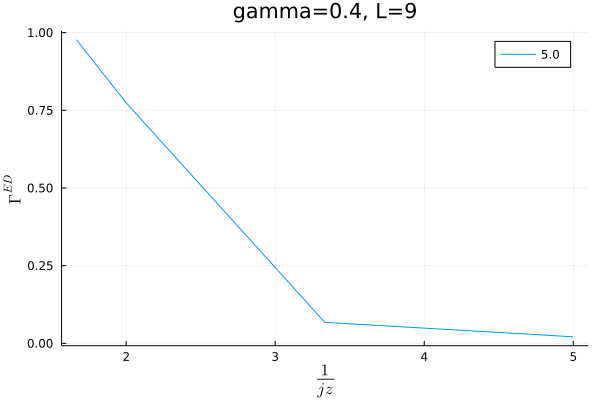

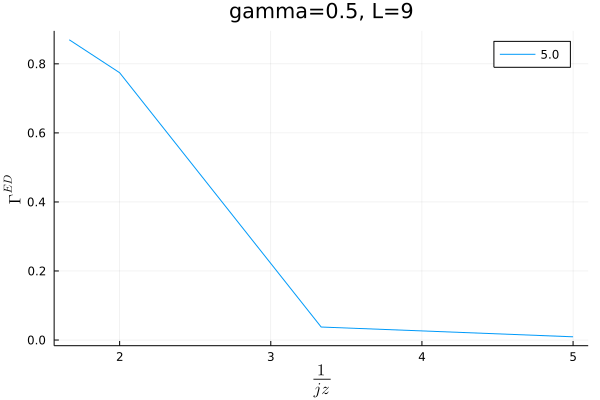

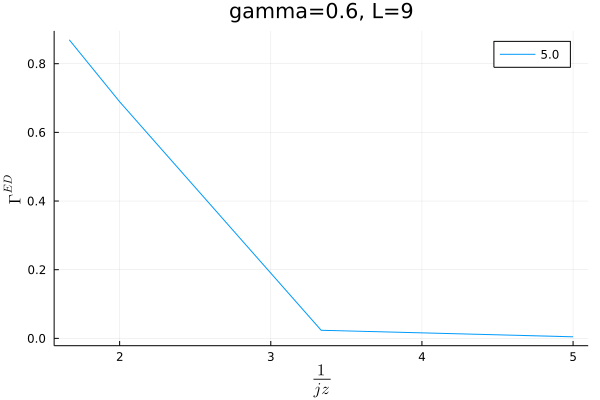

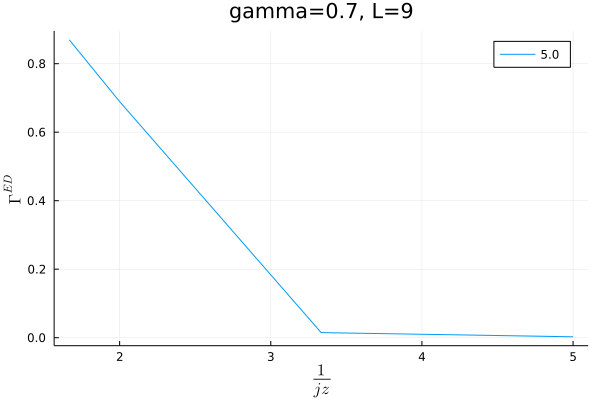

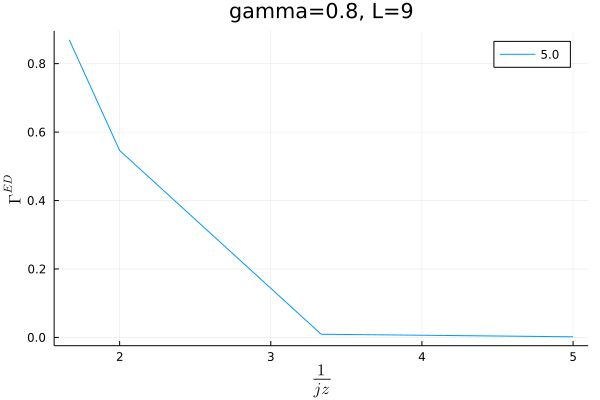

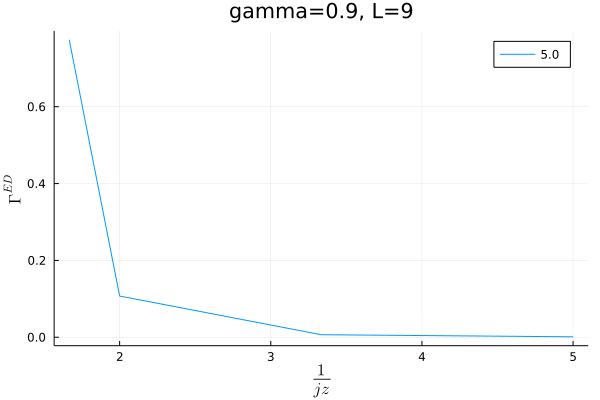

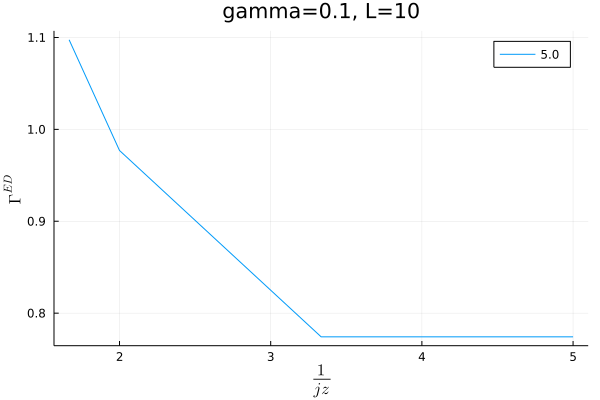

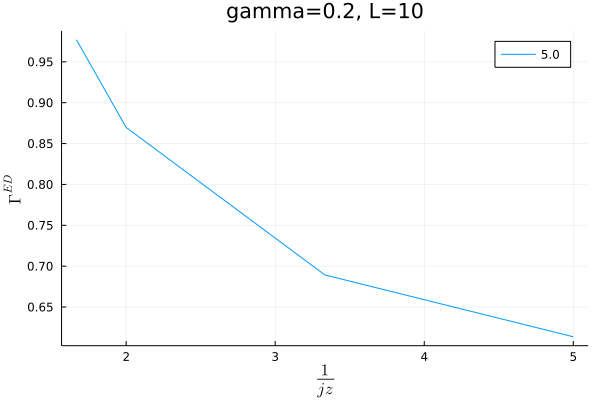

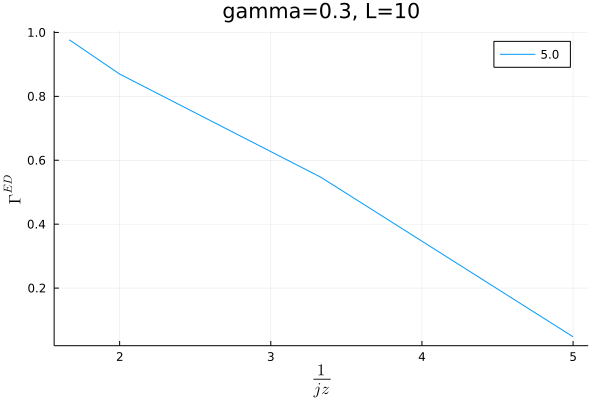

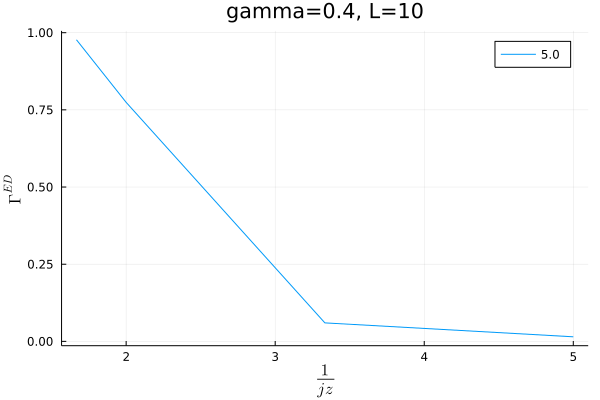

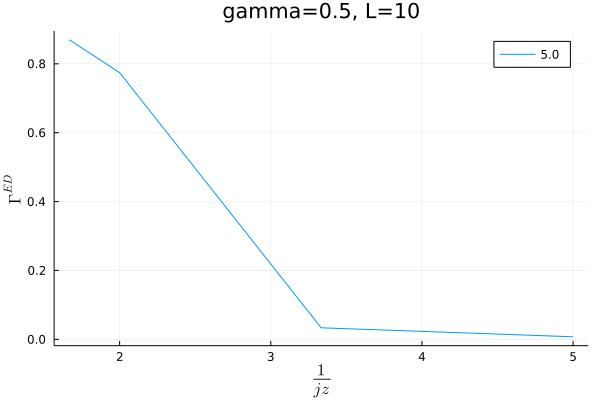

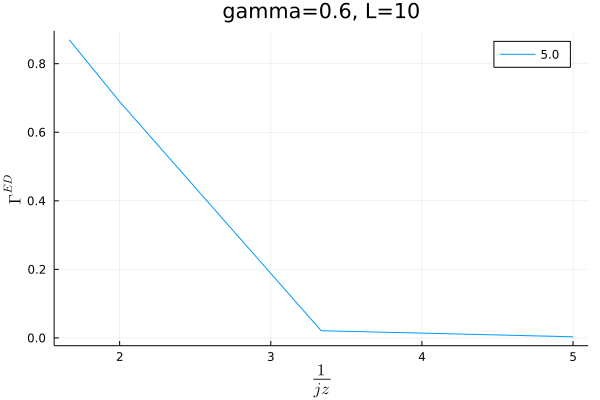

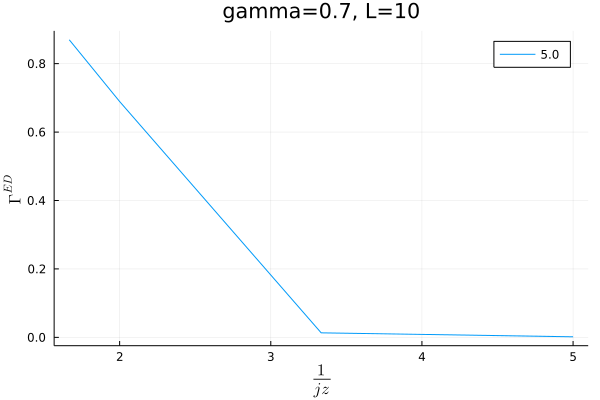

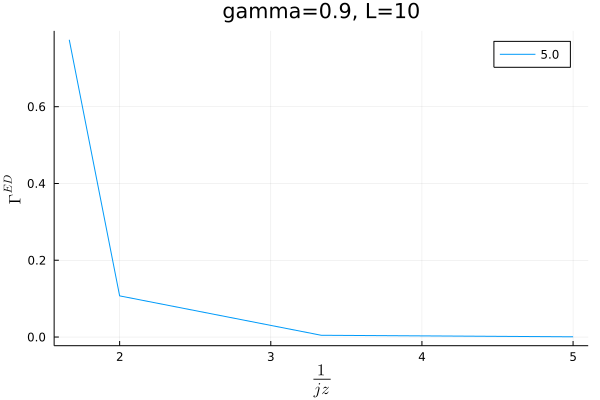

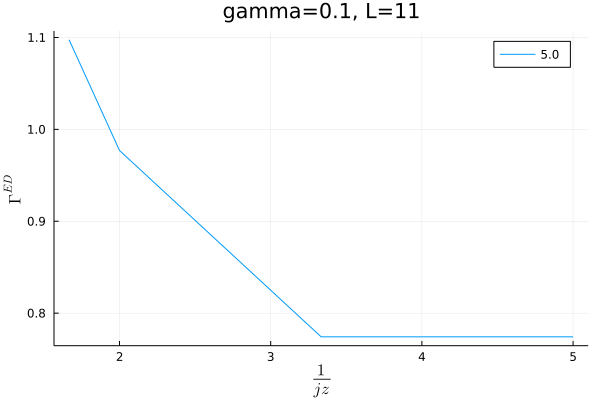

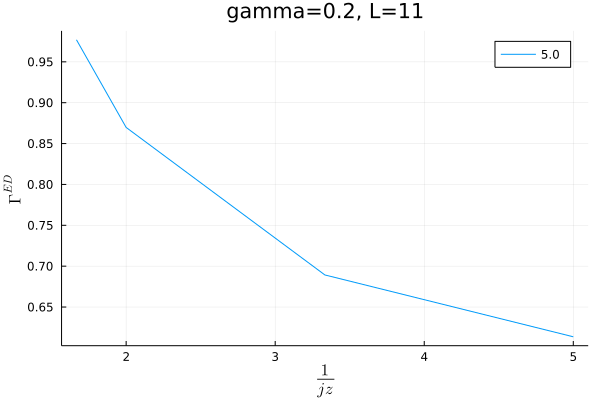

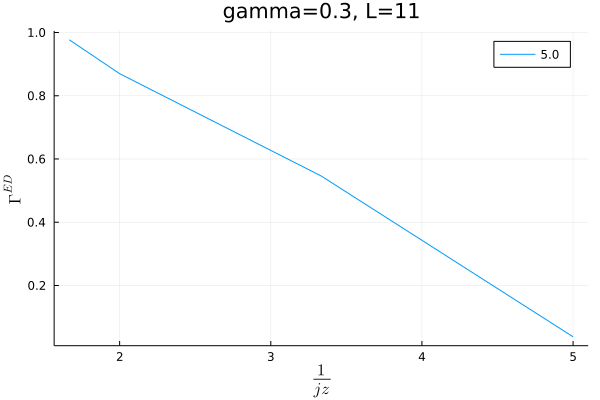

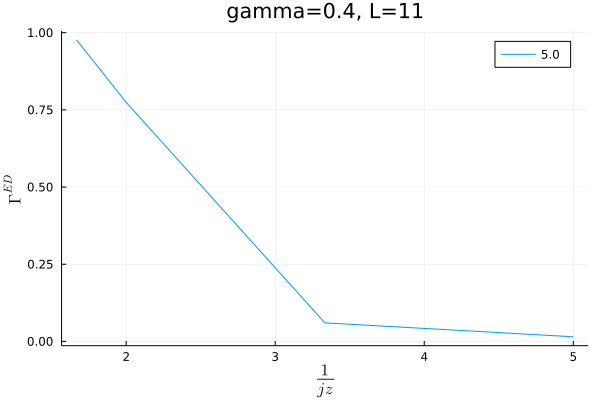

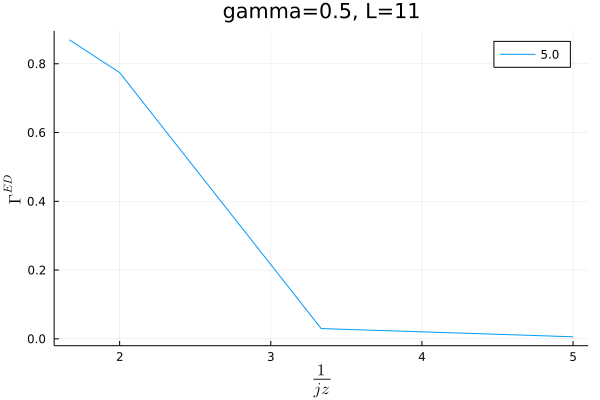

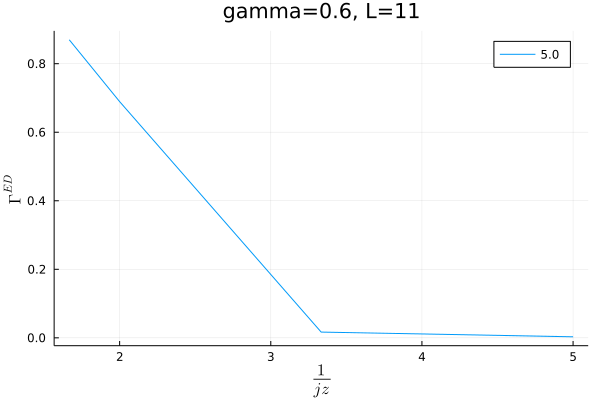

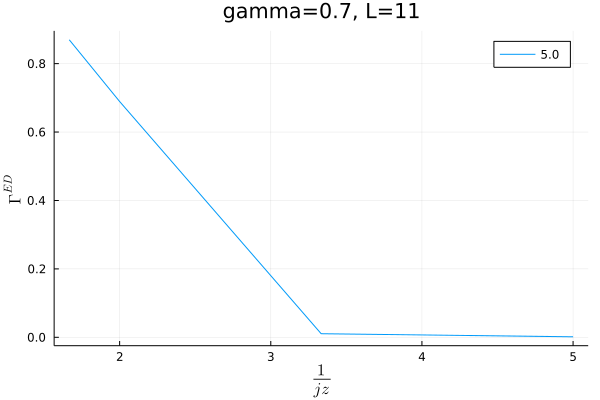

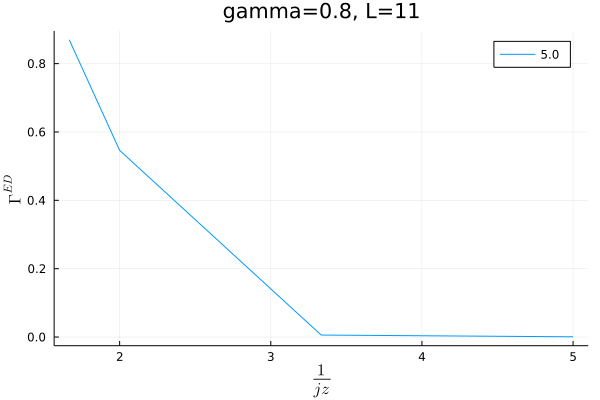

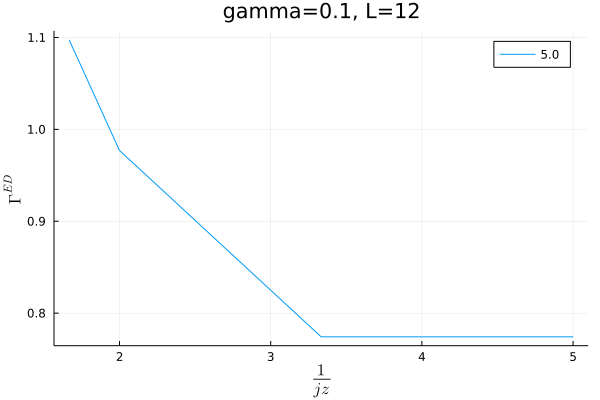

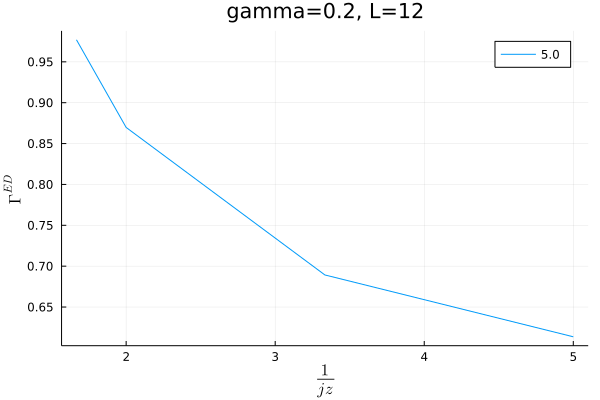

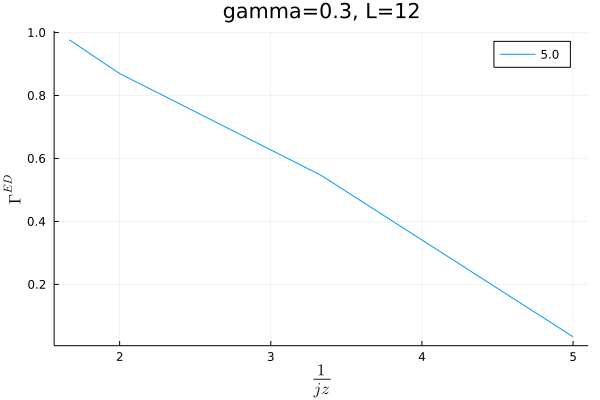

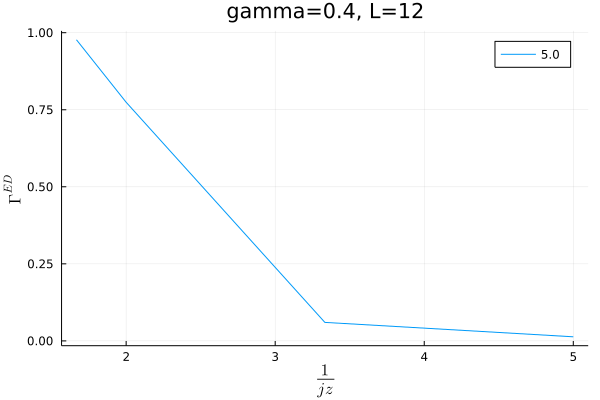

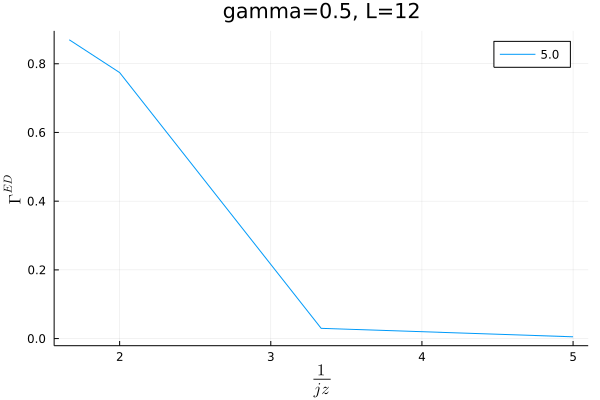

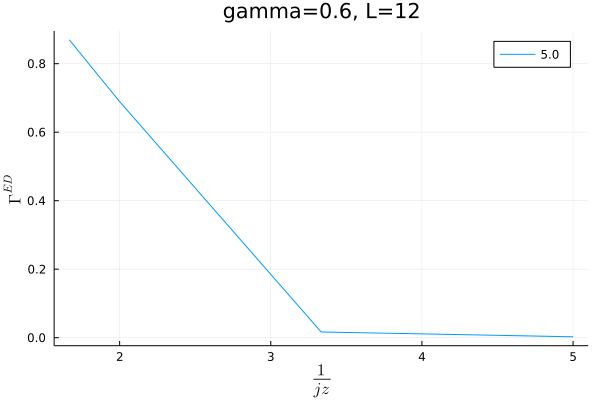

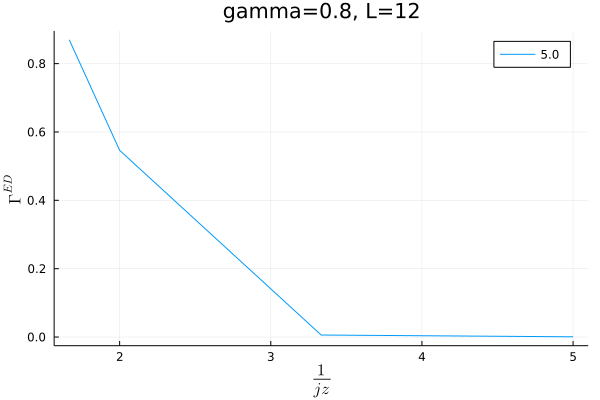

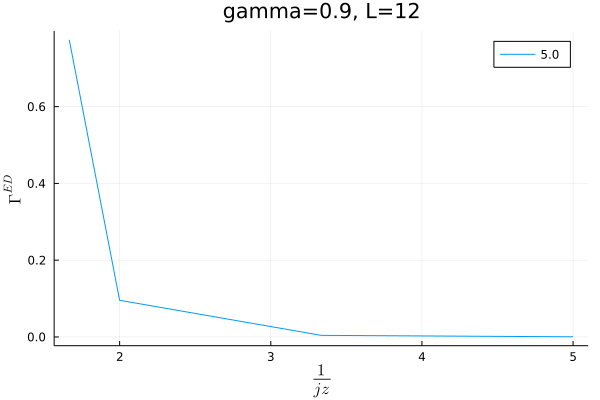

In [153]:
L_interested = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
jz_interested = jz_list
jz_interested_inv = 1.0 ./ jz_interested
gamma_interested = gamma_list

gamma_eds2 = zeros( length(L_interested) )

for (L_i, L) in enumerate(L_interested)
    for (gamma_i, gamma) in enumerate(gamma_interested)
        
        gamma_eds = zeros( length(jz_interested) )
        for (jz_i, jz) in enumerate(jz_interested)
            gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma)], t_list, 1 ) 
            gamma_eds[jz_i] = gamma_ed
        end
        
        display( Plots.plot( jz_interested_inv, gamma_eds ,
                xlabel=L"\frac{1}{jz}", ylabel=L"\Gamma^{ED}",
                title="gamma="*string(gamma)*", L="*string(L), 
                label = string.(jz_interested_inv'))
            )
    end
end

Paper results for  𝐿=12,𝑔=0.3,𝛾=0.9,𝐽𝑧=[0.2,0.3,0.4,0.5,0.6] 

$ Γ𝐸𝐷=[0.0003511191734215131,0.003511191734215131,0.01629750834620644,0.049770235643321115,0.11497569953977356] $

With the following values of the phi_o[1] prefactor:

$ 𝜙𝑜[1]=[0.9250580305566379,0.8884343217564664,0.8355696345255338,0.7695021442483835,0.6956912570108919] $

Generated naively:

$ Γ𝐸𝐷=[0.0004037017258596554,0.004641588833612777,0.026560877829466867,0.10722672220103233,0.34304692863149183] $



In [ ]:
0.2
0.0004037017258596554
0.0002848035868435802
0.0002257019719633919

0.3
0.004641588833612777
0.003274549162877728
0.0023101297000831605
 
0.4
0.026560877829466867
0.01873817422860384
0.013219411484660286

0.5
0.10722672220103233
0.0756463327554629
0.047508101621027955


In [ ]:
phi_os = [0.9250580305566379,0.8884343217564664,0.8355696345255338,0.7695021442483835,0.6956912570108919]

### NOTE: Missing an important piece of info

In the `get_gamma_ed` function in the cell below, Ainf is generated as a function of time. We loop through Ainf(t) until it dips below a `exp(-1)` threshhold. In the original code, the threshhold is `phi_o[1]^2*exp(-1)`.

It seems phi_o is unnormalized, and so the threshhold must account for that. The issue is **I do not know what phi_o is**. I am not sure what the analogous expression in the paper is. Phi_o is loaded from data files in all the code chunks I have read through.

Here is a snippet of the threshhold code I have been referring to:

```
        phi_o,phi_e = zero_modes(bs[1:29])
        
        ....
        
        # determining gamma from ed ainf
        for dati in length(ainf):-1:1
            if ainf[dati] > phi_o[1]^2*exp(-1)
                data3_ed[di] = 1/plt_times[dati]
                break
            end
        end
```

The bs values seem to correspond to the paper's b_n values, recursively defined basis operators used in the Lanczos algorithm. So when A_inf is recast, these b_n values are the basis for tridiagonzliaing A_inf. I don't fully understand why normalizations of this phi_o value is necesary for determining lifetime cutoffs for A_inf though.

In [4]:
function get_gamma_ed_from_ainf( ainf::Array{Float64}, t_list::Array{Float64} )
    #=
    Calculates a first order approximation for \Gamma^{ED} for a given (L, gamma, jz, jx, g)
    L aught to be 12 or higher or else the \Gamma^{ED} value becomes dependant on L.
    =#
    
    # 0 is the dummy value for gamma_ed, filled in using the loop
    gamma_ed = 0
    
    # determining gamma from ed ainf
    for dati in length(ainf):-1:1
        ##########
        # NOTE ### The following `if` statement is slightly off from the original code! 
        ########## Values may be off by up to 50%, so everything is currently an approximation...
        # if ainf[dati] > phi_o[1]^2*exp(-1) # <- Daniel's code
        if ainf[dati] > exp(-1) # <- adapted code, without phi_o
            gamma_ed = 1/t_list[dati]
            break
        end
    end
    
    return gamma_ed
    
end

function get_gamma_ed( L::Int64, gamma::Float64, jz::Float64, jx::Float64, g::Float64 )
    #=
    Calculates a first order approximation for \Gamma^{ED} for a given (L, gamma, jz, jx, g)
    L aught to be 12 or higher or else the \Gamma^{ED} value becomes dependant on L.
    =#
    
    # Logarithmic time scale for Ainf, default from 0.1 to 10000
    t_list = 10.0 .^(range(-1,stop=4,length=100))
    
    # get_Ainf(L::Int64,g::Float64,jx::Float64,jz::Float64, gamma::Float64,times::AbstractArray)
    # Uses Daniel's code entirely to calculate
    ainf = ED.get_Ainf(L, g, jx, jz, gamma, t_list)
    
    # 0 is the dummy value for gamma_ed, filled in using the loop
    gamma_ed = 0
    
    # determining gamma from ed ainf
    for dati in length(ainf):-1:1
        ##########
        # NOTE ### The following `if` statement is slightly off from the original code! 
        ########## Values may be off by up to 50%, so everything is currently an approximation...
        # if ainf[dati] > phi_o[1]^2*exp(-1) # <- Daniel's code
        if ainf[dati] > exp(-1) # <- adapted code, without phi_o
            gamma_ed = 1/t_list[dati]
            break
        end
    end
    
    return gamma_ed
    
end

function plot_gamma_ed_vs_jz_inv( L::Int64, 
                                gamma_list::Array{Float64}, jz_list::Array{Float64}, 
                                jx::Float64, g::Float64)
    #=
        Returns gamma_ed_list, which is a matrix of \Gamma^{ED} values where
        each row is a gamma value, each column is a jz value.
        
        This function allows one to easily plot gamma_ed_list against inverted jz
        values.
    =#
    if L<12
        println("L not large enough for system size independant lifetimes...")
    end
    
    # gamma_ed_list
    # each row corresponds to a gamma value, columns are different jz values
    gamma_ed_list = zeros( (length(gamma_list), length(jz_list)) )

    # Iterate through gamma values
    for (i, gamma) in enumerate(gamma_list)
        # Iterate through jz values
        for (j, jz) in enumerate(jz_list)
            # Using the above function, calculate \Gamma^{(ED)} for a given (jz, gamma) pair
            gamma_ed = get_gamma_ed( L, gamma, jz, jx, g  ) 
            gamma_ed_list[i, j] = gamma_ed
        end
    end
    
    return gamma_ed_list
end

plot_gamma_ed_vs_jz_inv (generic function with 1 method)

In [27]:
L_list = [4, 6, 8, 10, 12]
gamma_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.6, 0.9]
jz_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
jx = 1.0
g = 0.3
jz_list_inv = 1. ./ jz_list

gamma_ed_list_Ls = Dict()

for L in L_list
    gamma_ed_list = plot_gamma_ed_vs_jz_inv( L, gamma_list, jz_list, jx, g  ) 
    gamma_ed_list_Ls[L] = gamma_ed_list
end

# save("gamma_ed_list_Ls.jld", "gamma_ed_list_Ls", gamma_ed_list_Ls)
# test = load("gamma_ed_list_Ls.jld")

L not large enough for system size independant lifetimes...
L not large enough for system size independant lifetimes...
L not large enough for system size independant lifetimes...
L not large enough for system size independant lifetimes...


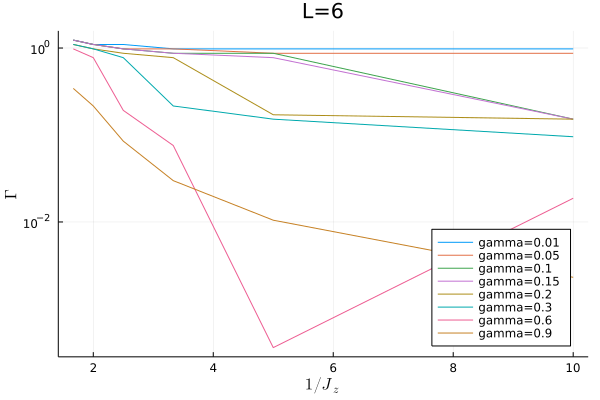

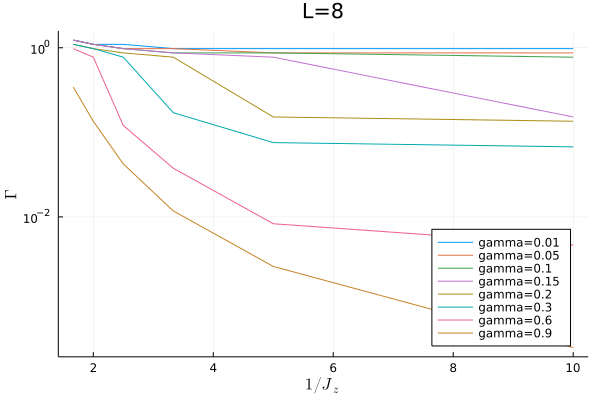

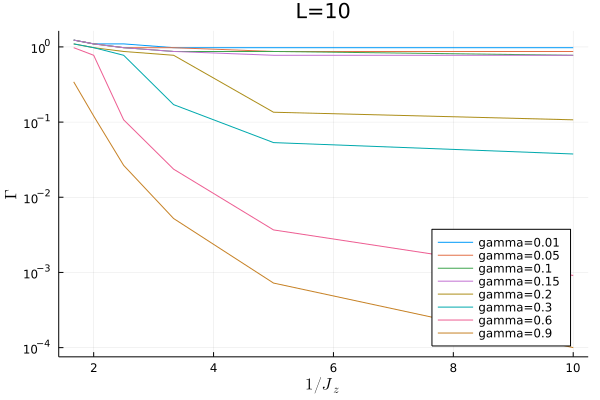

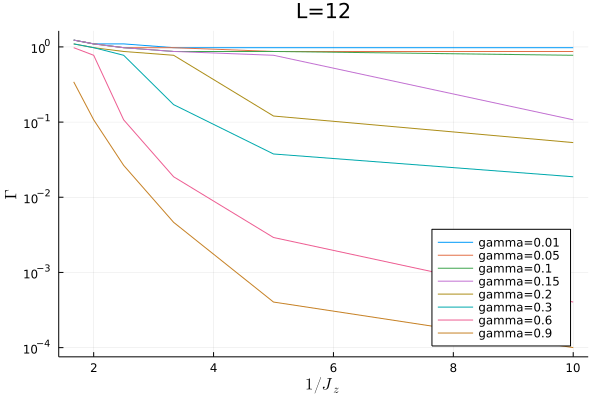

In [43]:
gedl_L_keys = sort( Integer.( keys(gamma_ed_list_Ls) ) )

for gedl_L_key in gedl_L_keys
#     print( gamma_ed_list_Ls[gedl_L_key] )
    gedl = gamma_ed_list_Ls[gedl_L_key]
    
    display( 
        Plots.plot( jz_list_inv, gedl[:,:]',
                    label = "gamma=".* string.(gamma_list'), legend=:bottomright,
                    xlabel=L"1/J_z", ylabel=L"\Gamma", title="L="*string(gedl_L_key),
                    yaxis=:log)
        )
end

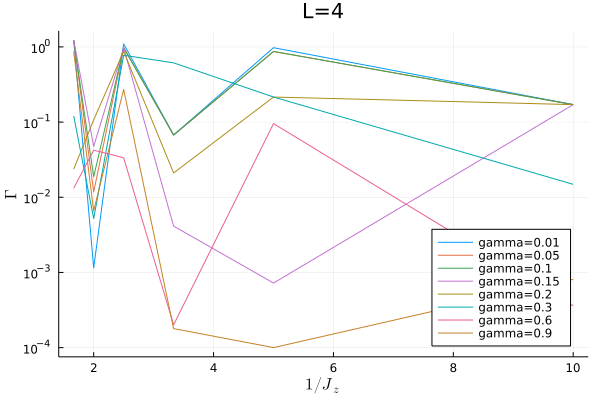

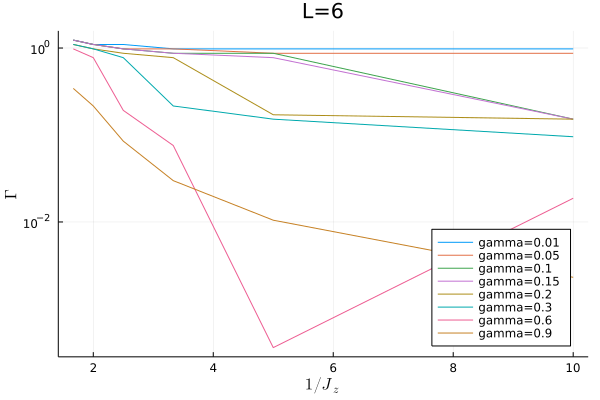

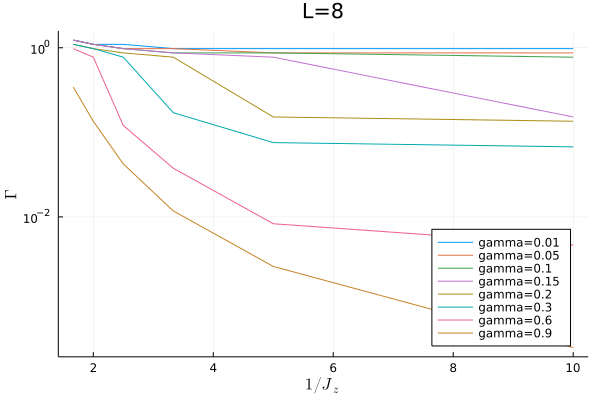

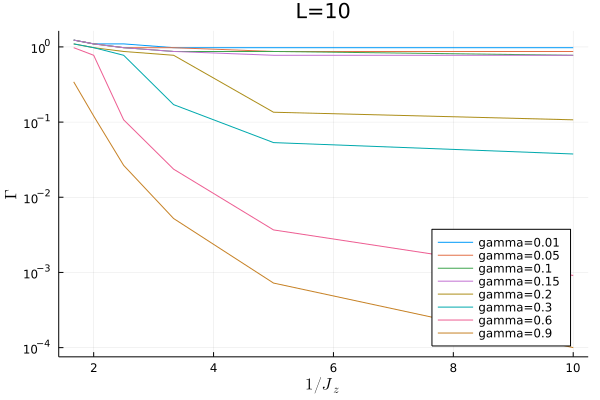

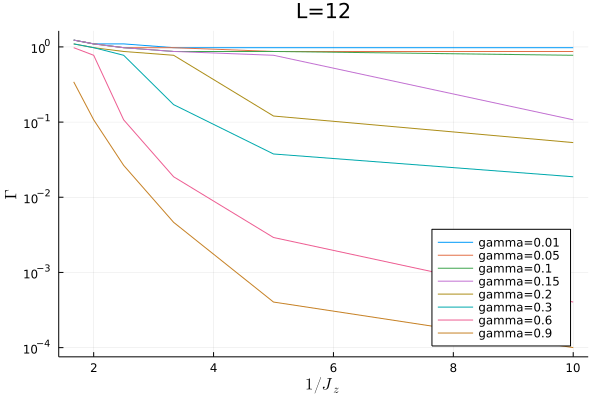

In [163]:
gedl_L_keys = sort( Integer.( keys(gamma_ed_list_Ls) ) )

for gedl_L_key in gedl_L_keys
#     print( gamma_ed_list_Ls[gedl_L_key] )
    gedl = gamma_ed_list_Ls[gedl_L_key]
    
    display( 
        Plots.plot( jz_list_inv, gedl[:,:]',
                    label = "gamma=".* string.(gamma_list'), legend=:bottomright,
                    xlabel=L"1/J_z", ylabel=L"\Gamma", title="L="*string(gedl_L_key),
                    yaxis=:log)
        )
end

# Plotting $ \Gamma^{(ED)} $ against $ 1/j_z $ for various $\gamma$

In [166]:
gamma_ed_list_Ls[12][:,:]'

6×8 adjoint(::Matrix{Float64}) with eltype Float64:
 0.97701  0.869749  0.774264  …  0.0187382  0.000403702  0.0001
 0.97701  0.869749  0.869749     0.0376494  0.00291505   0.000403702
 0.97701  0.97701   0.869749     0.170735   0.0187382    0.00464159
 1.0975   0.97701   0.97701      0.774264   0.107227     0.0265609
 1.0975   1.0975    1.0975       0.97701    0.774264     0.107227
 1.23285  1.23285   1.23285   …  1.0975     0.97701      0.343047

In [18]:
L = 8
gamma_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.6, 0.9]
jz_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
jx = 1.0
g = 0.3
jz_list_inv = 1. ./ jz_list

gamma_ed_list = plot_gamma_ed_vs_jz_inv( L, gamma_list, jz_list, jx, g  ) 

L not large enough for system size independant lifetimes...


8×6 Matrix{Float64}:
 0.97701      0.97701     0.97701    1.0975     1.0975    1.23285
 0.869749     0.869749    0.97701    0.97701    1.0975    1.23285
 0.774264     0.869749    0.869749   0.97701    1.0975    1.23285
 0.151991     0.774264    0.869749   0.97701    1.0975    1.23285
 0.135305     0.151991    0.774264   0.869749   0.97701   1.0975
 0.0673415    0.0756463   0.170735   0.774264   0.97701   1.0975
 0.00464159   0.00830218  0.0376494  0.12045    0.774264  0.97701
 0.000284804  0.00259502  0.0117681  0.0422924  0.135305  0.343047

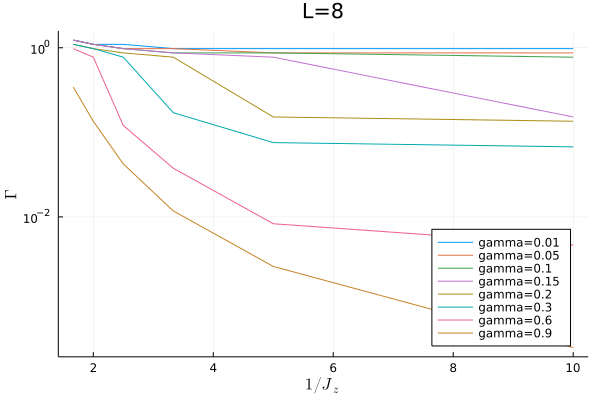

In [19]:
Plots.plot( jz_list_inv, gamma_ed_list[:,:]',
            label = "gamma=".* string.(gamma_list'), legend=:bottomright,
            xlabel=L"1/J_z", ylabel=L"\Gamma", title="L="*string(L),
            yaxis=:log)

# Plotting $ \Gamma^{(ED)} $ against $ 1/j_z $ for various $\gamma$

# For various L

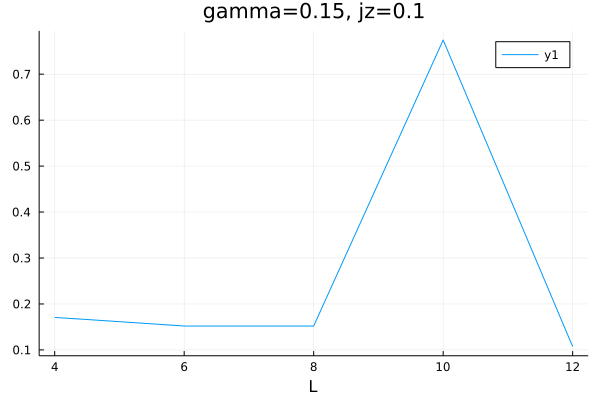

In [194]:
function plot_gamma_ed_vs_L( jz_interested::Float64, gamma_interested::Float64)
    L_list = [4, 6, 8, 10, 12]
    gamma_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.6, 0.9]
    jz_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    jx = 1.0
    g = 0.3
    jz_list_inv = 1. ./ jz_list

    gedl_L_keys = sort( Integer.( keys(gamma_ed_list_Ls) ) )
    to_plot = zeros( length( gedl_L_keys ) )

    jz_index = findall(jz_list->jz_list==jz_interested, jz_list)
    gamma_index = findall(gamma_list->gamma_list==gamma_interested, gamma_list)

    for (key_i, gedl_L_key) in enumerate(gedl_L_keys)
        gedl = gamma_ed_list_Ls[gedl_L_key]
        to_plot[key_i] = gedl[gamma_index, jz_index][1]
    end

    display(
    Plots.plot( L_list, to_plot,
                title="gamma="*string(gamma_interested)*", jz="*string(jz_interested),
                xlabel="L")
        )
end

jz_interested = 0.1
gamma_interested = 0.15
plot_gamma_ed_vs_L( jz_interested, gamma_interested)

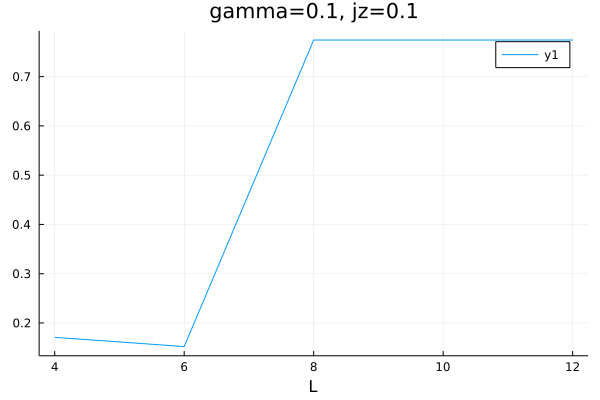

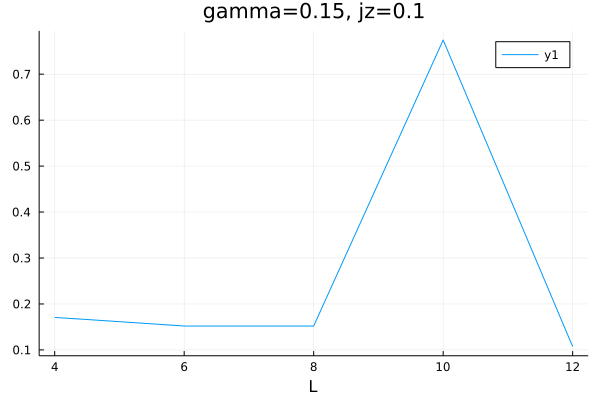

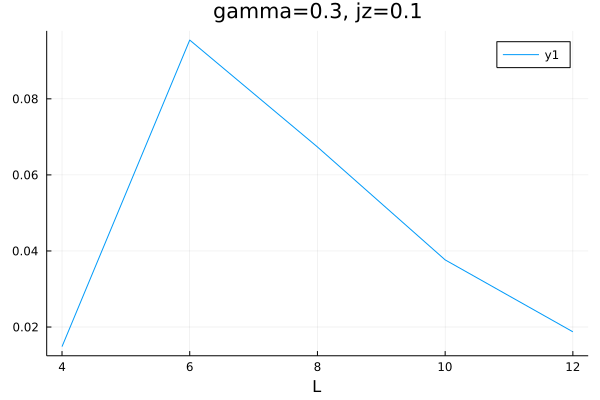

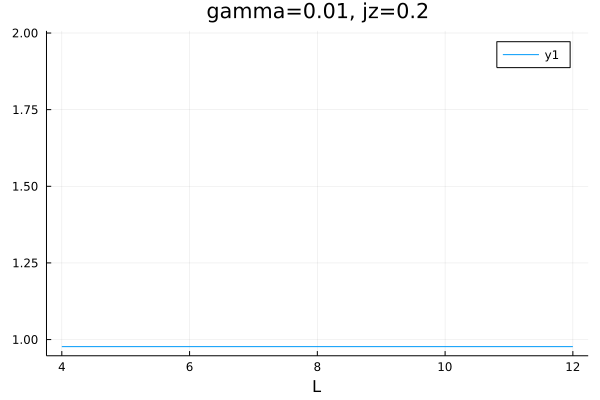

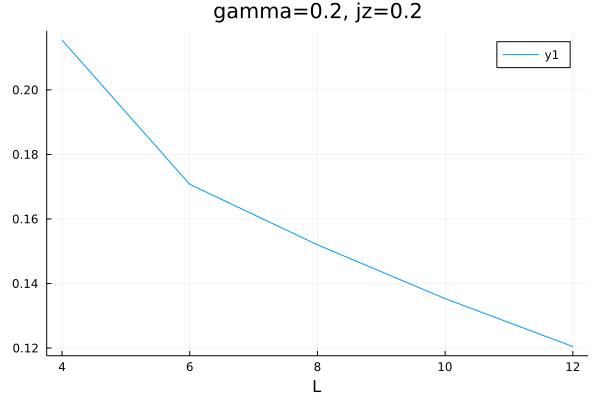

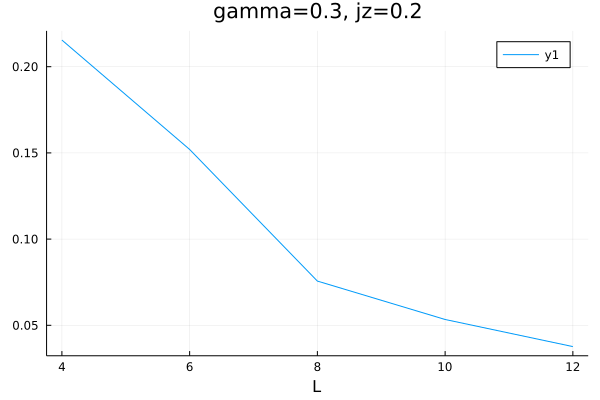

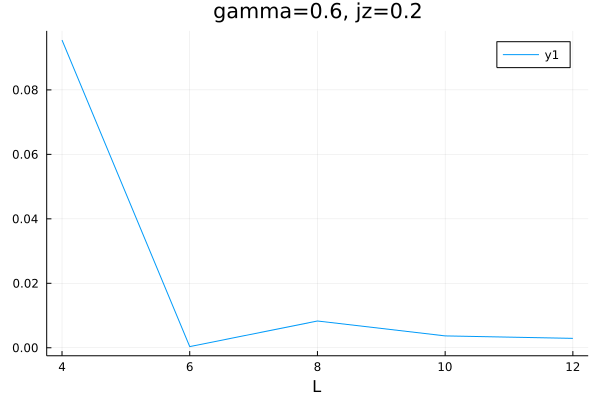

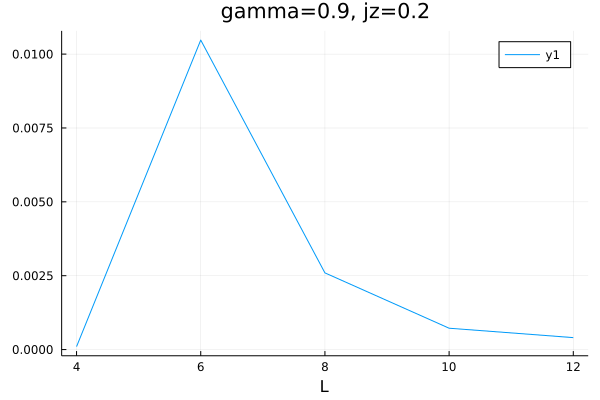

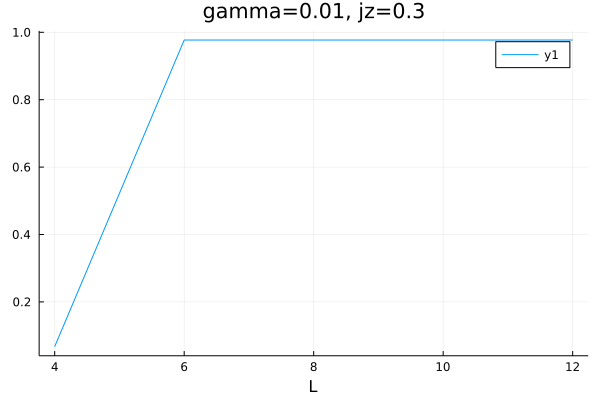

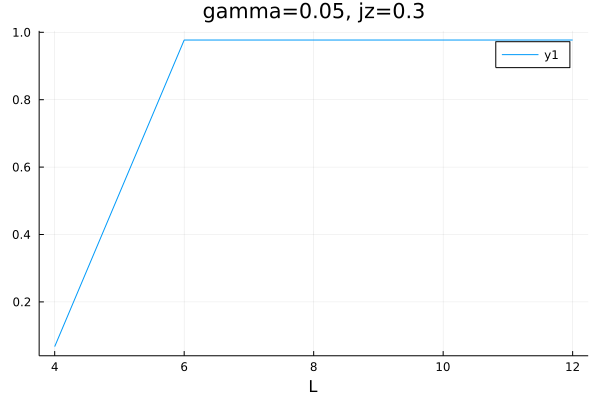

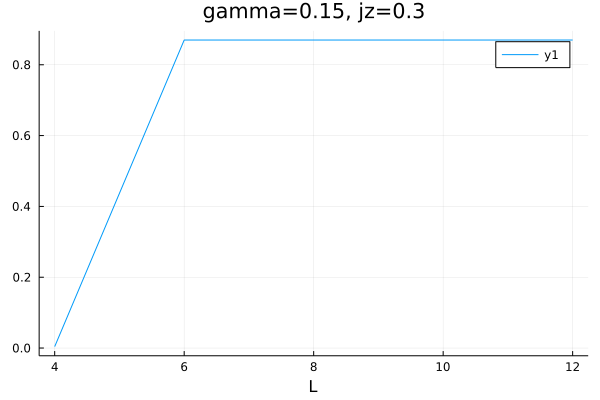

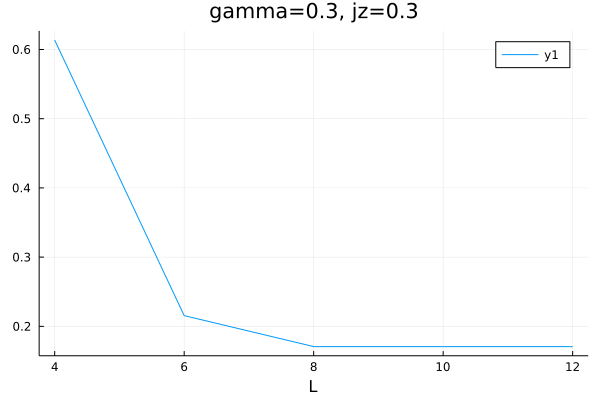

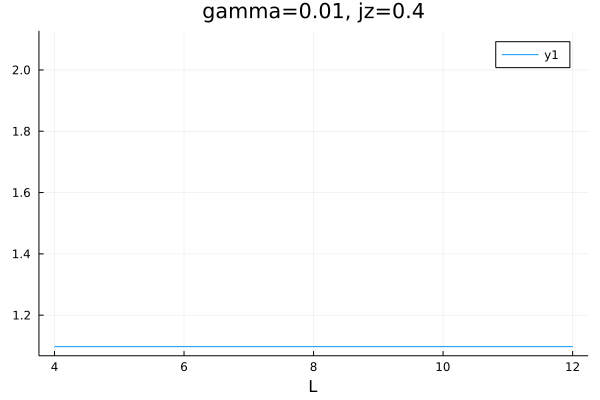

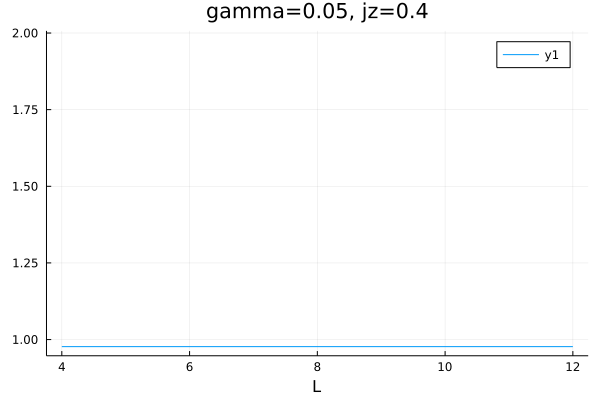

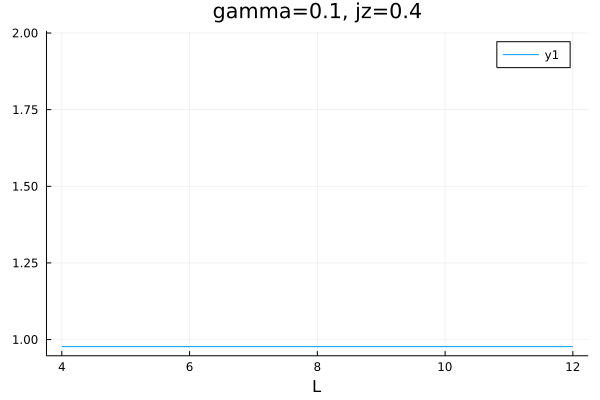

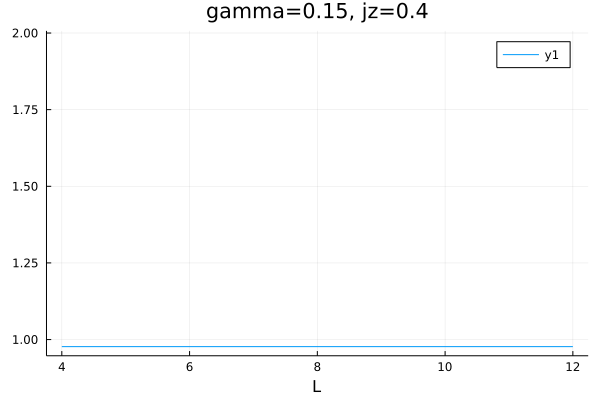

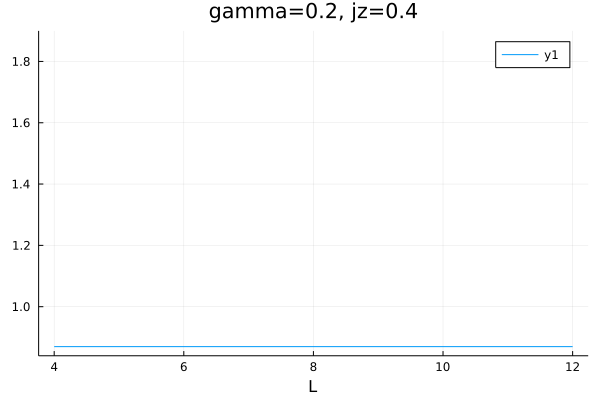

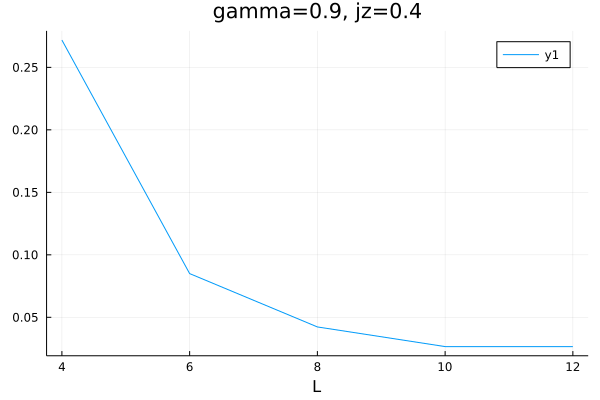

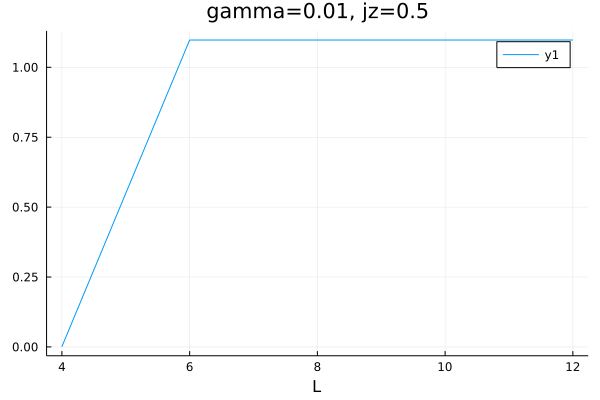

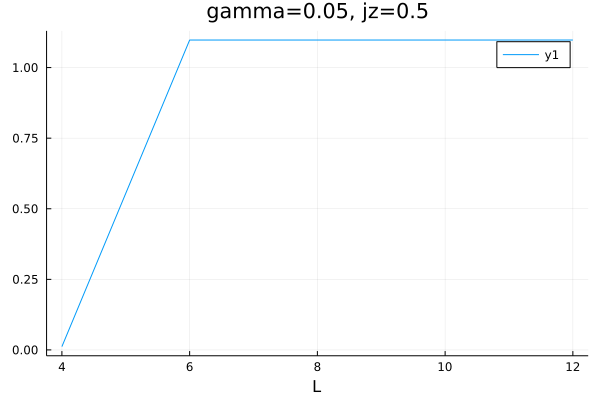

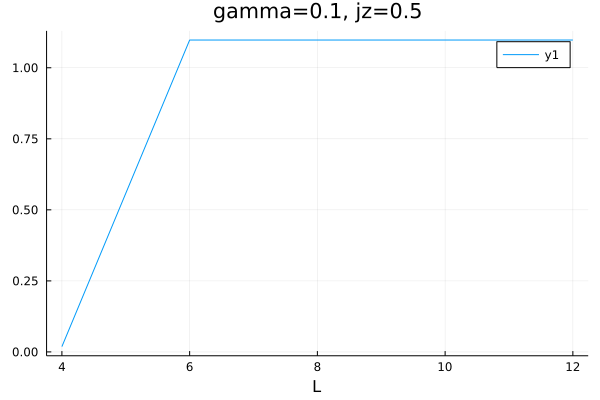

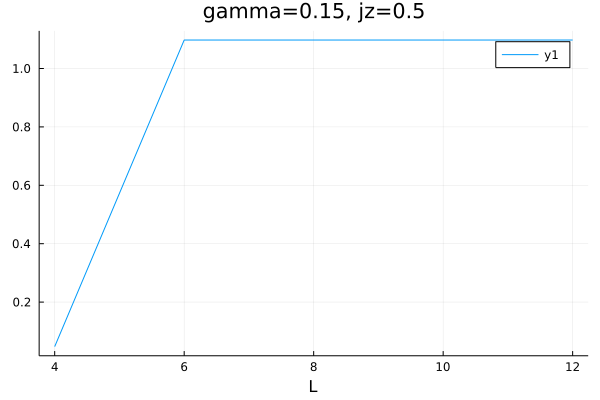

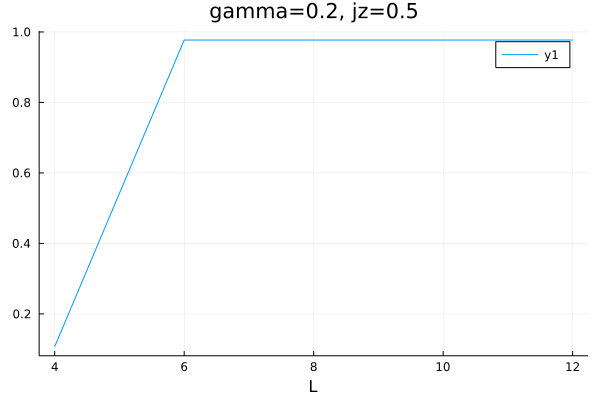

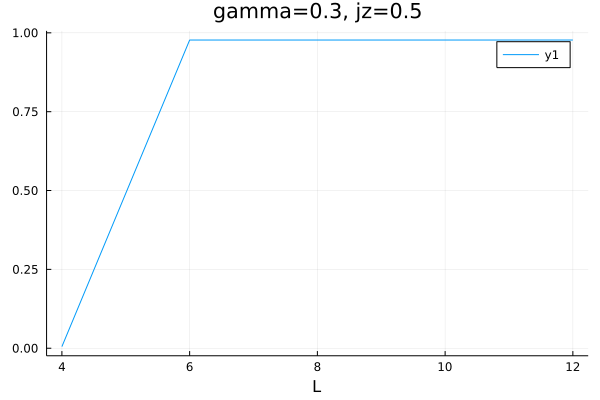

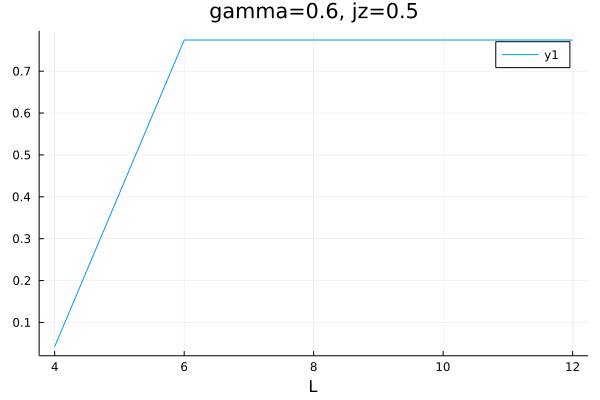

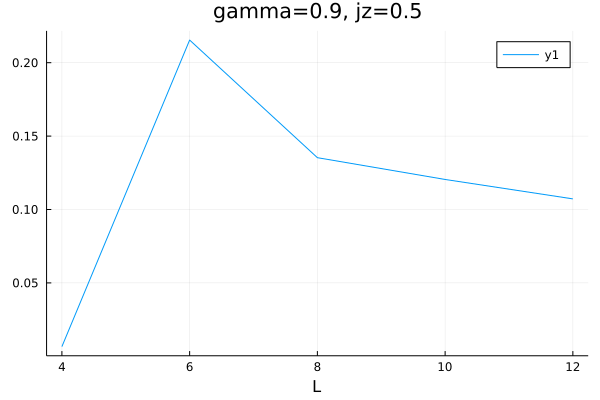

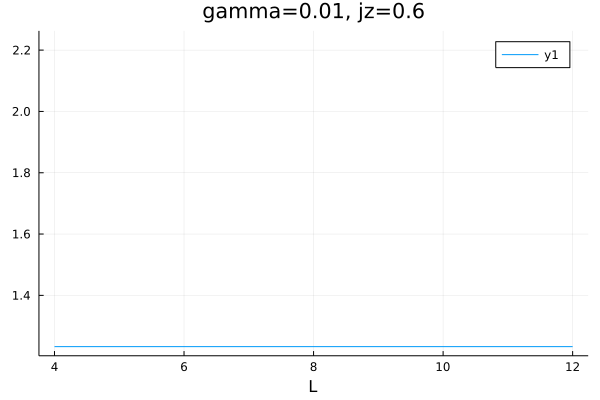

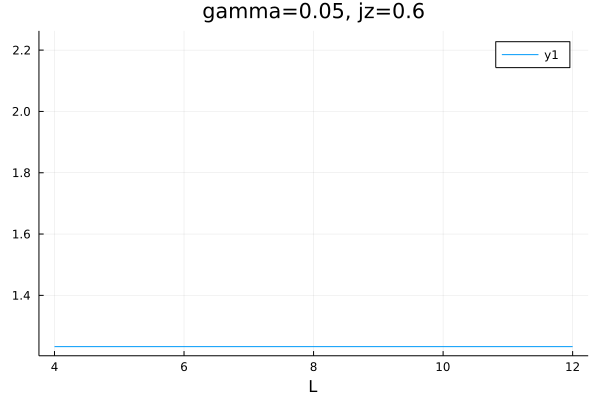

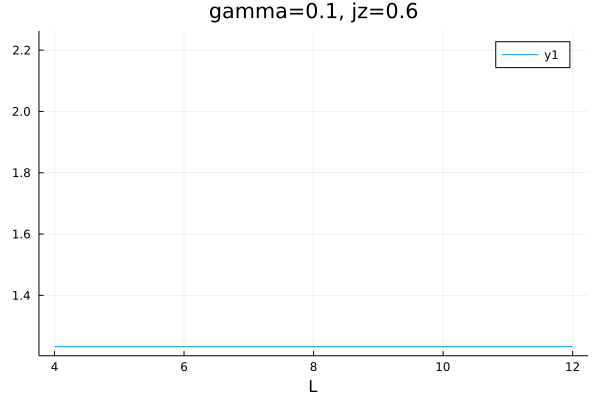

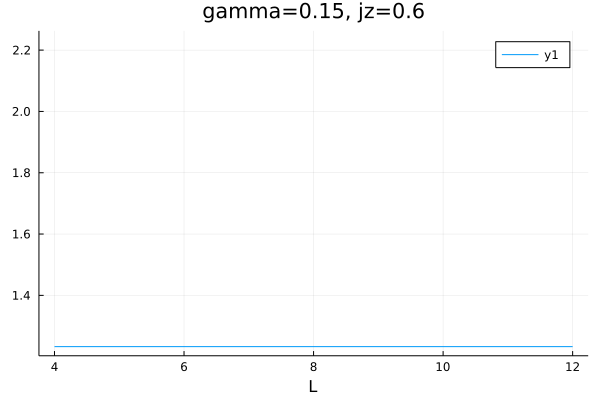

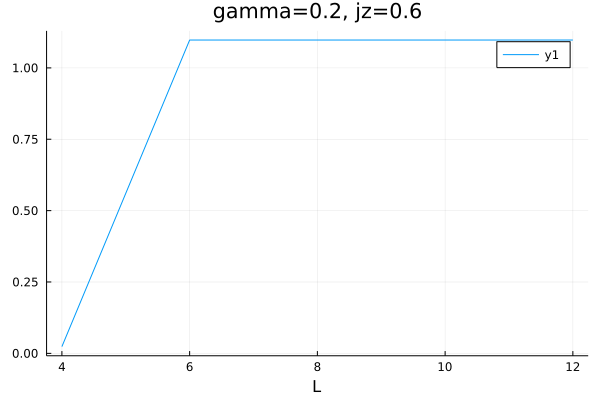

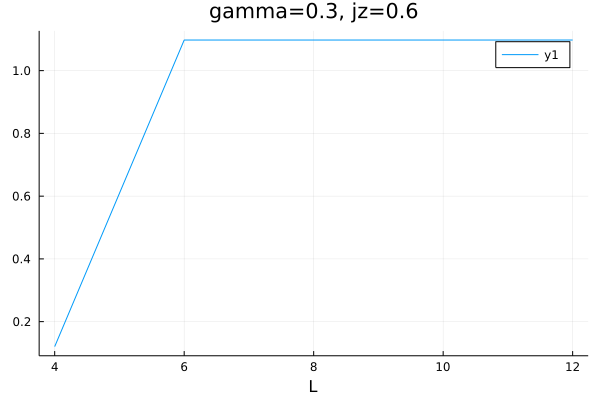

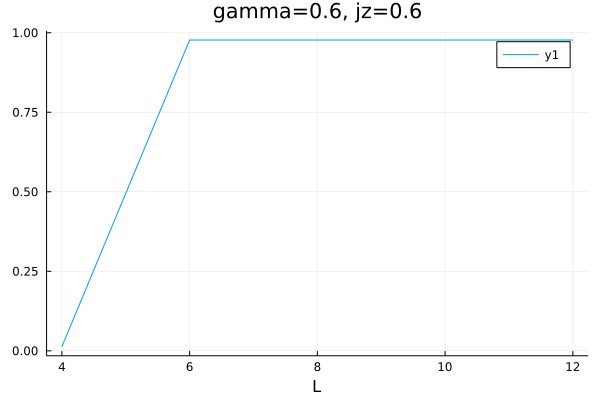

In [195]:
for jz_interested in jz_list
    for gamma_interested in gamma_list
        plot_gamma_ed_vs_L( jz_interested, gamma_interested)
    end
end

In [196]:
jz_interested = 0.3
gamma_interested = 0.2
plot_gamma_ed_vs_L( jz_interested, gamma_interested )

In [92]:
gamma_ed_list_Ls[4]'

6×8 adjoint(::Matrix{Float64}) with eltype Float64:
 0.170735    0.170735   0.170735   0.170735     …  0.000359381  0.000811131
 0.97701     0.869749   0.869749   0.000722081     0.0954548    0.0001
 0.0673415   0.0673415  0.0673415  0.00413201      0.000200923  0.000178865
 1.0975      0.97701    0.97701    0.97701         0.033516     0.271859
 0.00114976  0.0117681  0.0187382  0.0475081       0.0422924    0.00657933
 1.23285     1.23285    1.23285    1.23285      …  0.0132194    0.869749

# Plotting Ainf

Below is some basic code for plotting Ainf if it is at all useful. One cell plots Ainf for a variety of gamma values, the other cel plots Ainf for a variety of jz values.

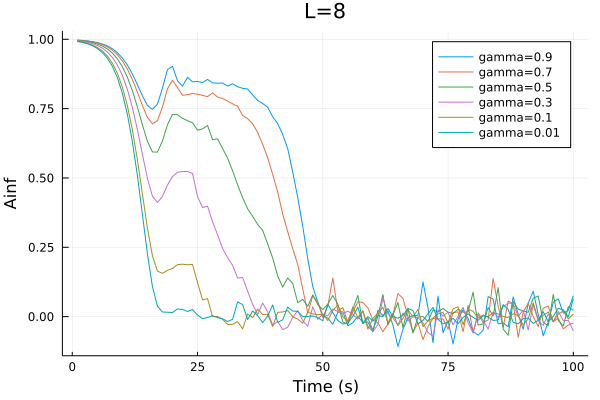

In [11]:
L = 8
gamma_list = [0.9, 0.7, 0.5, 0.3, 0.1, 0.01]
jz = 0.2
jx = 1.0
g = 0.3

t_list = 10.0 .^(range(-1,stop=7,length=100))

Ainfs_list = zeros((length(jz_list), length(t_list)))
for (i, gamma) in enumerate(gamma_list)
    Ainf = ED.get_Ainf(L, g, jx, jz, gamma, t_list)
    Ainfs_list[i,:] = Ainf
end

Plots.plot(Ainfs_list', #xticks = ([1,11,21,30],[0.1,1,10,100]),
    title = "L="*string(L), label = "gamma=".* string.(gamma_list'), 
    xlabel="Time (s)", ylabel="Ainf")

# savefig("L8_Ainf.png") # save the most recent fig

In [13]:
L = 8
gamma = 0.9
jz_list = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9, 0.95, 1.0]
jx = 1.0
g = 0.3

t_list = 10.0 .^(range(-1,stop=7,length=100))

Ainfs_list = zeros((length(jz_list), length(t_list)))
for (i, jz) in enumerate(jz_list)
    Ainf = ED.get_Ainf(L, g, jx, jz, gamma, t_list)
    Ainfs_list[i,:] = Ainf
end

Plots.plot(Ainfs_list', #xticks = ([1,11,21,30],[0.1,1,10,100]),
    title = "L="*string(L), label = "jz=".* string.(jz_list'), 
    xlabel="Time (s)", ylabel="Ainf")

# savefig("L8_Ainf.png") # save the most recent fig